# Análise exploratória de dados do ENEM 2023
- Neste notebook, realizarei a análise exploratória dos microdados do ENEM 2023. 
- O objetivo consiste em desvendar padrões e insights sobre aspectos socioeconômicos e educacionais do Brasil e do exame, que tem papel imprescindível na sociedade.
- Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão aplicadas. 
- Irei realizar duas análises, sob perspectivas diferentes.
- Para a primeira delas, a métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação. Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo. Irei nomeá-la de Análise de Desempenho.
- Para a segunda, e principal análise, serão analisados fatores que influenciam a ausência (estudantes com nota nula) do candidato na prova. Portanto, serão utilizados dados de todos os candidatos, dando foco aos que estavam ausentes. Irei nomeá-la de Análise de Abstenção.
- Perguntas respondidas na Análise de Desempenho:
    - Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
    - Em média, quais os estados com as maiores e as menores notas gerais?
    - Como a renda influencia o desempenho do candidato?
    - Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
    - Como a ocupação do pai e da mãe influenciam a nota geral do candidato?
    - De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho do candidato?
    - De que forma o tipo de escola (pública ou privada) influencia o desempenho do candidato?
    - Existe alguma correlação entre o número de pessoas em casa e a nota geral do candidato?
- Perguntas respondidas na Análise de Abstenção:
    - A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
    - A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
    - A renda familiar mensal influencia a ausência do candidato na prova?
    - Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
    - Quais regiões apresentam as maiores e as menores taxas de abstenção?
    - Existe alguma diferença na taxa de abstenção entre alunos de escola pública e privada?
    - A ocupação do pai e da mãe influenciam a ausência do candidato na prova?

Sobre o ENEM:

- O Exame Nacional do Ensino Médio (ENEM) tem como objetivo primordial aferir se aqueles que dele participam demonstram, ao final do ensino médio, individualmente, domínio dos princípios científicos e tecnológicos que presidem a produção moderna e se detêm conhecimento das formas contemporâneas de linguagem.  
- A estrutura conta com 4 (quatro) provas objetivas, uma de cada área do conhecimento, contendo 45 (quarenta  e  cinco) questões de múltipla escolha e uma redação.
- Descrição das Áreas de Conhecimento e Componentes Curriculares do ENEM: Linguagens, Códigos e suas tecnologias (Língua Portuguesa, Literatura, Língua Estrangeira, Artes, Educação Física e Tecnologias da Informação e Comunicação), Ciências Humanas e suas tecnologias (História, Geografia, Filosofia e Sociologia), Ciências da Natureza e suas tecnologias (Química, Física e Biologia), Matemática e suas tecnologias (Matemática).
- Em 2023, as provas foram aplicadas nos dias 5 e 12 de novembro de 2023, sendo que no primeiro dia os participantes realizaram as provas de Linguagens, Códigos e suas tecnologias e Redação e de Ciências Humanas e suas tecnologias e, no segundo, as provas de Ciências da Natureza e suas tecnologias e Matemática e suas tecnologias. 

Sobre os microdados:

- Os microdados se constituem no menor nível de desagregação de dados recolhidos por pesquisas, avaliações e exames realizados. No caso do ENEM, os dados estão por participante. Nunca constaram nos dados divulgados quaisquer variáveis que permitissem a identificação direta do  participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente. Tratam-se, portanto, de dados anonimizados.

#### 1. Importando as bibliotecas

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

# Utils.
%cd ../
from src.eda_utils import *

# Visualize all the columns.
pd.set_option('display.max_columns', None)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

#mpl.rcParams['figure.dpi']          = 150

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
VERMELHO_FORTE = '#461220'
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

/Users/pedrohenriquealmeidaoliveira/Documents/UnB/tcc/enem-2023/enem-2023


#### 2. Coletando os dados

In [30]:
# Reading the memory optimized data.
path = 'input/data/clean_df.parquet'
df = pd.read_parquet(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927146 entries, 0 to 3927145
Data columns (total 43 columns):
 #   Column                              Dtype   
---  ------                              -----   
 0   faixa_etaria                        category
 1   sexo                                category
 2   estado_civil                        category
 3   status_conclusao_ensino_medio       category
 4   ano_concluiu                        int64   
 5   escola                              category
 6   treineiro                           category
 7   uf_prova                            category
 8   presenca_cn                         category
 9   presenca_ch                         category
 10  presenca_lc                         category
 11  presenca_mt                         category
 12  nota_cn                             float32 
 13  nota_ch                             float32 
 14  nota_lc                             float32 
 15  nota_mt                         

- Através da limpeza dos dados foi possível reduzir o tamanho do dataset de +2 GB para +243.4 MB, uma redução de quase 90%! Agora poderemos realizar a análise e manipulação dos dados de forma eficiente.
- Valores nulos e duplicados já foram identificados e tratados, bem como tratamentos relativos às variáveis. Está tudo pronto para que exploremos os dados e obtenhamos insights acerca da educação do país.

#### 3. Análise exploratória de dados
- Irei explorar os dados, a fim de obter insights educacionais e socioeconômicos no contexto do maior exame de admissão em universidades do Brasil. Desse modo, análises univariada, bivariada e multivariada serão realizadas. 
- Para realizar a Análise de Desempenho, dado que a minha principal métrica será a nota média geral, irei separar os dados dos estudantes que estavam presentes em ambos os dias de prova. Aqueles que faltaram os dois dias ou um dia (com nota nula) iriam afetar medidas como a média e distribuições, introduzindo distorções nas estatísticas e desviando o foco. 
    - Para realizar a Análise de Desempenho, irei criar uma variável que informa a nota média geral no exame para cada candidato. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados. 
- Para realizar a Análise de Abstenção, dado que o objetivo consiste em identificar os fatores que influenciam a ausência do estudante nos dias de prova, serão utilizados todos os dados disponíveis.
    - Para realizar a Análise de Abstenção, irei criar uma variável que informa se o candidato estava presente nos dois dias de prova. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados. 

In [31]:
# Obtain all candidates data for absence analysis.
absent_df = df.copy()

# Create a column indicating wheter the student was present in both days of the exam.
absent_df['presente'] = (absent_df['presenca_lc'] == 'Presente') & \
                        (absent_df['presenca_ch'] == 'Presente') & \
                        (absent_df['presenca_cn'] == 'Presente') & \
                        (absent_df['presenca_mt'] == 'Presente')

# Obtain data containing just candidates who were present in both days for performance analysis.
performance_df = df.loc[(df['presenca_cn'] == 'Presente') & \
                        (df['presenca_mt'] == 'Presente') & \
                        (df['presenca_lc'] == 'Presente') & \
                        (df['presenca_ch'] == 'Presente')]

# Create average grade variable.
performance_df['nota_media'] = (performance_df['nota_lc'] + \
                                performance_df['nota_ch'] + \
                                performance_df['nota_cn'] + \
                                performance_df['nota_mt'] + \
                                performance_df['nota_redacao']) / 5

####  3.1 Variáveis numéricas e categóricas
- Irei acessar quais são as variáveis numéricas e categóricas a priori, para ter um senso de quais visualizações e abordagens de análise escolher, além de formular perguntas a serem feitas aos dados.
- Irei acessar a cardinalidade de cada variável categórica. Este é um ponto importante, pois pode guiar possíveis ajustes e escolhas de visualizações.

In [4]:
categorical_features = df.select_dtypes('category').columns.to_list()
numerical_features = df.select_dtypes('number').columns.to_list()
print(f'Há {len(categorical_features)} variáveis categóricas. São elas: {categorical_features}')
print(f'Há {len(numerical_features)} variáveis numéricas. São elas: {numerical_features}')

Há 36 variáveis categóricas. São elas: ['faixa_etaria', 'sexo', 'estado_civil', 'status_conclusao_ensino_medio', 'escola', 'treineiro', 'uf_prova', 'presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt', 'lingua', 'escolaridade_pai', 'escolaridade_mae', 'ocupacao_pai', 'ocupacao_mae', 'renda_familiar_mensal', 'empregado_domestico_em_casa', 'numero_banheiros_em_casa', 'numero_quartos_em_casa', 'numero_carros_em_casa', 'numero_motos_em_casa', 'numero_geladeiras_em_casa', 'numero_freezers_em_casa', 'numero_lavadoras_em_casa', 'numero_secadoras_em_casa', 'numero_microondas_em_casa', 'numero_lavadoras_de_loucas_em_casa', 'possui_aspirador_de_po_em_casa', 'numero_tvs_em_casa', 'possui_dvd_em_casa', 'possui_tv_assinatura_em_casa', 'numero_celulares_em_casa', 'possui_telefone_fixo_em_casa', 'numero_computadores_em_casa', 'possui_acesso_a_internet_em_casa']
Há 7 variáveis numéricas. São elas: ['ano_concluiu', 'nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao', 'numero_pessoas_em_cas

In [5]:
print('Cardinalidade das variáveis categóricas: ')
for feature in categorical_features:
    print(f'{feature} ({df[feature].nunique()})', end=', ')

Cardinalidade das variáveis categóricas: 
faixa_etaria (7), sexo (2), estado_civil (5), status_conclusao_ensino_medio (4), escola (3), treineiro (2), uf_prova (27), presenca_cn (2), presenca_ch (2), presenca_lc (2), presenca_mt (2), lingua (2), escolaridade_pai (7), escolaridade_mae (7), ocupacao_pai (6), ocupacao_mae (6), renda_familiar_mensal (17), empregado_domestico_em_casa (4), numero_banheiros_em_casa (5), numero_quartos_em_casa (5), numero_carros_em_casa (5), numero_motos_em_casa (5), numero_geladeiras_em_casa (5), numero_freezers_em_casa (5), numero_lavadoras_em_casa (5), numero_secadoras_em_casa (5), numero_microondas_em_casa (5), numero_lavadoras_de_loucas_em_casa (5), possui_aspirador_de_po_em_casa (2), numero_tvs_em_casa (5), possui_dvd_em_casa (2), possui_tv_assinatura_em_casa (2), numero_celulares_em_casa (5), possui_telefone_fixo_em_casa (2), numero_computadores_em_casa (5), possui_acesso_a_internet_em_casa (2), 

- De forma geral, as variáveis categóricas apresentam baixa cardinalidade. Com exceção estado de realização da prova, que possui 27 domínios distintos. Renda também tem cardinalidade média.

#### 4. Análise univariada
- Irei analisar a distribuição dos dados, a fim de acessar valores típicos apresentados pelos candidatos em determinadas variáveis, conhecendo a nossa base.
- Aqui, serão analisadas as distribuições com foco na Análise de Desempenho, uma vez que esta é a análise principal, constitui uma amostra representativa da população e as distribuições de ambas análises são semelhantes.

#### 4.1 Distribuições das variáveis demográficas

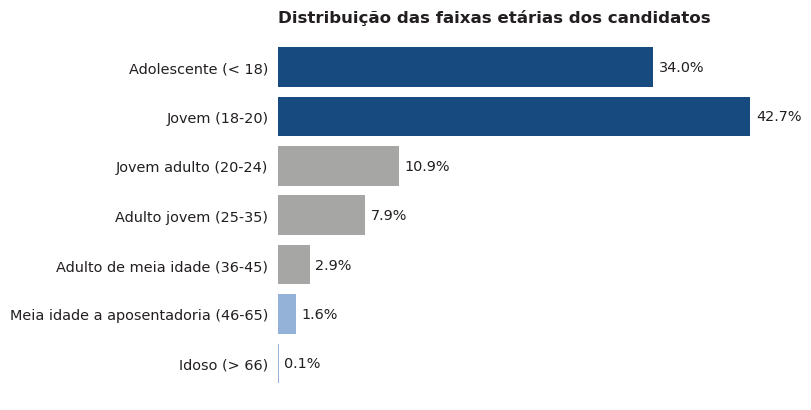

In [10]:
# Group the data by age bin.
age_grouped = performance_df.groupby(['faixa_etaria'])[['faixa_etaria']].count().rename(columns={'faixa_etaria': 'count'}).reset_index()
age_grouped['pct'] = round(age_grouped['count'] / np.sum(age_grouped['count']) * 100, 2) 
age_grouped['limit_age'] = age_grouped['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grouped = age_grouped.sort_values(by=['limit_age'], ascending=False).reset_index(drop=True)

# Plot.
barh_plot(age_grouped, 'faixa_etaria', 'pct',
          'Distribuição das faixas etárias dos candidatos', 
          range(len(age_grouped)), figsize=(6.4, 4.8),
          bar_color=[AZUL3]*2 + [CINZA8]*3 + 2*[AZUL1])

- É possível perceber que 88% dos candidatos têm até 24 anos, sendo adolescentes, jovens ou jovens adultos. Idosos e pessoas perto da idade de aposentadoria representam apenas 1.7% dessa população.

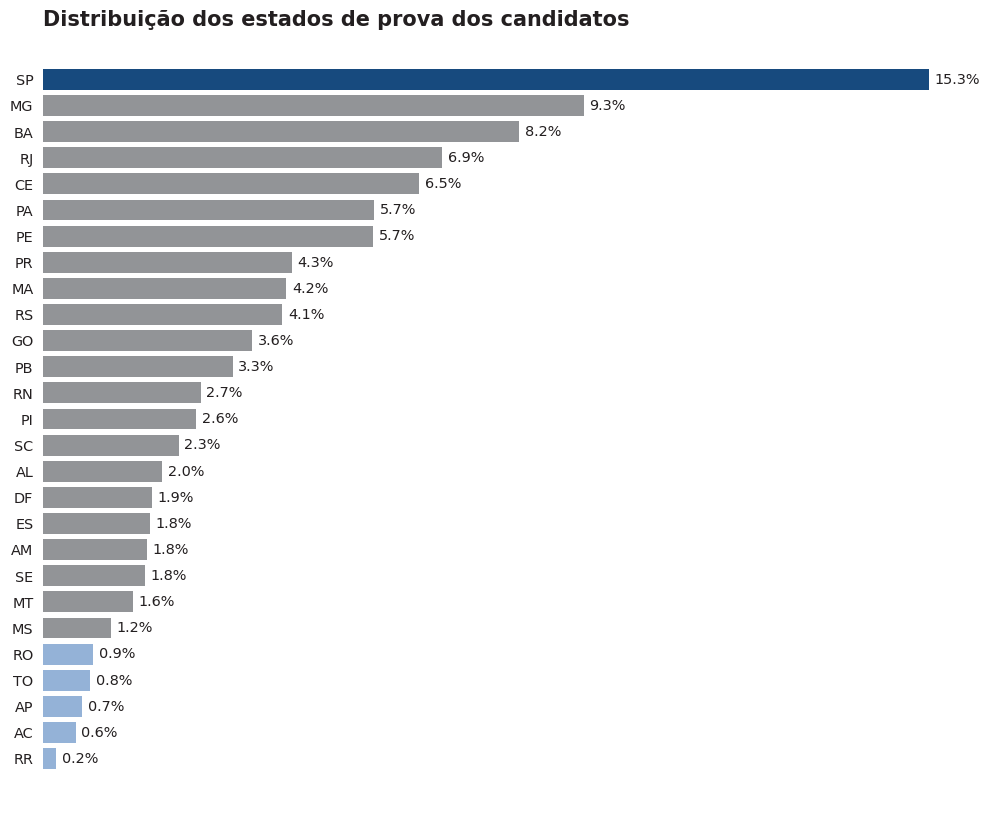

In [12]:
# Grouping the data by uf.
uf_grouped = performance_df.groupby(['uf_prova'])[['uf_prova']].count().rename(columns={'uf_prova': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
uf_grouped['pct'] = round(uf_grouped['count'] / np.sum(uf_grouped['count']) * 100, 2) 

barh_plot(uf_grouped, 'uf_prova', 'pct', 'Distribuição dos estados de prova dos candidatos',
          range(len(uf_grouped)), figsize=(12, 10), text_space=0.1, title_fontsize=15, invert_yaxis=True, bar_color=[AZUL1] + [CINZA7]*21 + [AZUL3]*5)

- É possível perceber que São Paulo é o estado com o maior número de candidatos, representando 15.3% do total, enquanto estados do norte, como RO, TO, AP, AC e RR não concentram nem 1% da população de candidatos cada.

In [13]:
(performance_df['escola'].value_counts(normalize=True) * 100).to_frame()

,proportion
escola,
Não respondeu,60.763465
Pública,30.972675
Privada,8.263860


- Muitos estudantes nao responderam a essa pergunta, mas, dentre os que responderam, é possível perceber que quase 4x mais estudam em escolas públicas, 31%, contra 8% em escolas privadas.

In [15]:
(performance_df['estado_civil'].value_counts(normalize=True) * 100).to_frame()

,proportion
estado_civil,
Solteiro(a),91.147960
Não informado,3.889534
Casado(a)/União Estável,3.585793
Divorciado(a)/Separado(a),1.284750
Viúvo(a),0.091963


In [16]:
(performance_df['treineiro'].value_counts(normalize=True) * 100).to_frame()

,proportion
treineiro,
Não,80.904758
Sim,19.095242


In [17]:
(performance_df['numero_pessoas_em_casa'].value_counts(normalize=True) * 100).to_frame()

,proportion
numero_pessoas_em_casa,
4,33.752535
3,28.252592
5,14.612786
2,13.070369
6,4.731236
1,2.703057
7,1.663354
8,0.680030
9,0.253560


- 90% dos estudantes possuem entre 1 a 5 pessoas em casa.

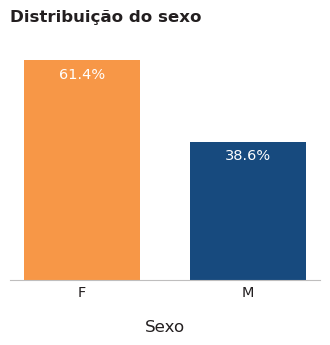

In [19]:
# Grouping the data by sex.
sex_grouped = performance_df.groupby(['sexo'])[['sexo']].count().rename(columns={'sexo': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
sex_grouped['pct'] = round(sex_grouped['count'] / np.sum(sex_grouped['count']) * 100, 2) 

bar_plot(sex_grouped, 'sexo', 'pct', 'Distribuição do sexo', 'Sexo', 
         figsize=(4, 3), title_pad=20, barwidth=0.7, 
         bar_color=[LARANJA1, AZUL1], invert_xaxis=False)

- 61% dos candidatos são mulheres, enquanto 39% são homens.

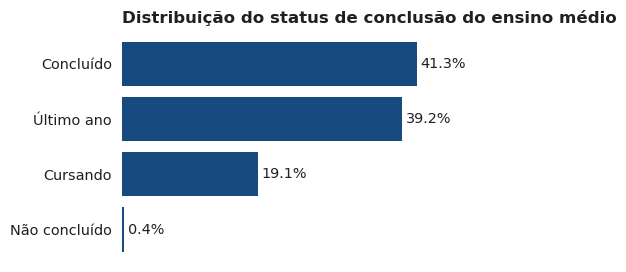

In [20]:
# Grouping the data by sex.
st_grouped = performance_df.groupby(['status_conclusao_ensino_medio'])[['status_conclusao_ensino_medio']].count().rename(columns={'status_conclusao_ensino_medio': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
st_grouped['pct'] = round(st_grouped['count'] / np.sum(st_grouped['count']) * 100, 2) 

barh_plot(st_grouped, 'status_conclusao_ensino_medio', 'pct', 
          title='Distribuição do status de conclusão do ensino médio', 
          ytick_range=(range(len(st_grouped))), invert_yaxis=True, figsize=(4, 3))

- Aproximadamente 81% dos candidatos já concluíram o ensino médio ou estão no último ano. Os 19% cursando representam treineiros, enquanto menos de 1% não concluíram nem estão cursando (provavelmente treineiros de outros anos).

#### 4.2 Distribuição do comparecimento em provas

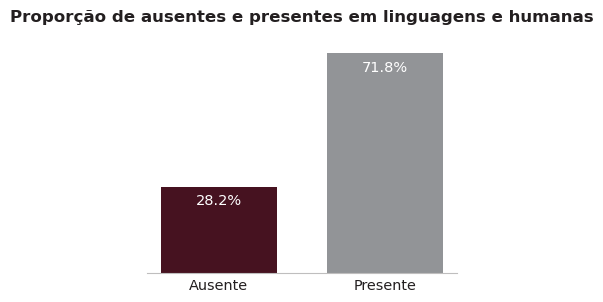

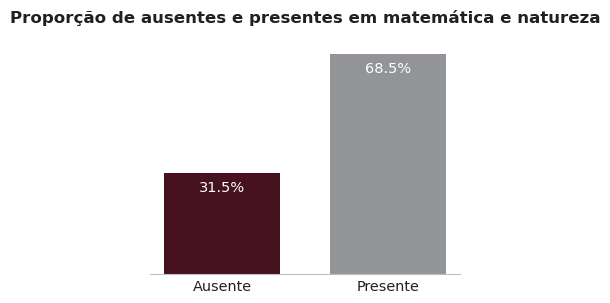

In [22]:
# Languages.
plc_grouped = absent_df.groupby(['presenca_lc'])[['presenca_lc']].count().rename(columns={'presenca_lc': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
plc_grouped['pct'] = round(plc_grouped['count'] / np.sum(plc_grouped['count']) * 100, 2) 

# Human sciences.
pch_grouped = absent_df.groupby(['presenca_ch'])[['presenca_ch']].count().rename(columns={'presenca_ch': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pch_grouped['pct'] = round(pch_grouped['count'] / np.sum(pch_grouped['count']) * 100, 2) 

# Math.
pmt_grouped = absent_df.groupby(['presenca_mt'])[['presenca_mt']].count().rename(columns={'presenca_mt': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pmt_grouped['pct'] = round(pmt_grouped['count'] / np.sum(pmt_grouped['count']) * 100, 2) 

# Nature sciences.
pcn_grouped = absent_df.groupby(['presenca_cn'])[['presenca_cn']].count().rename(columns={'presenca_cn': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pcn_grouped['pct'] = round(pcn_grouped['count'] / np.sum(pcn_grouped['count']) * 100, 2) 

bar_plot(plc_grouped, 'presenca_lc', 'pct', 
         title='Proporção de ausentes e presentes em linguagens e humanas',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA7, VERMELHO_FORTE],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

bar_plot(pmt_grouped, 'presenca_mt', 'pct', 
         title='Proporção de ausentes e presentes em matemática e natureza',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA7, VERMELHO_FORTE],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

- É possível perceber uma taxa de desistência 3% maior nas provas do segundo dia, totalizando 31.5% de candidatos que não foram. Isso pode indicar uma maior dificuldade dos estudantes em ciências exatas, as quais compõem as provas do segundo dia. De qualquer forma, ambos os dias apresentam uma alta taxa de desistência, o que é preocupante e revela como a educação brasileira ainda é precária. Há uma discrepância entre o nível do exame e o nível intelectual dos alunos. É provável que grande parte das desistências ocorram por despreparo/falta de confiança para realizar a prova e não por razões randômicas.

#### 4.3 Distribuição das notas nas provas objetivas e na redação

In [27]:
performance_df[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao', 'nota_media']].describe().T

,count,mean,std,min,25%,50%,75%,max
nota_cn,2678264.0,495.912689,87.678467,0.0,440.600006,494.000000,551.299988,868.400024
nota_ch,2678264.0,526.204285,86.703560,0.0,471.200012,532.900024,586.900024,823.000000
nota_lc,2678264.0,520.297180,74.043709,0.0,473.700012,524.900024,571.799988,820.799988
nota_mt,2678264.0,534.026855,131.411560,0.0,431.399994,523.799988,630.299988,958.599976
nota_redacao,2678264.0,626.601929,209.287674,0.0,520.000000,620.000000,780.000000,1000.000000
nota_media,2678264.0,540.608582,95.148262,0.0,475.660004,539.179993,606.320007,862.579956


- A nota média geral para alunos que estavam presentes em ambos os dias é aproximadamente 540.
- A nota média máxima no ENEM de 2023 foi de aproximadamente 862.
- Analisando os percentis, metade dos alunos obtiveram uma nota de até 539, enquanto 75% obtiveram uma nota de até 606.
- A nota média em linguagens é aproximadamente 520. A nota média em ciências humanas é aproximadamente 526.
- Observando os percentis, metade dos candidatos obtém uma nota de até 525 em linguagens e 533 em ciências humanas.
- A nota média em ciências da natureza é aproximadamente 496. A nota média em matemática é aproximadamente 534.
- Observando os percentis, metade dos candidatos obtém uma nota de até 494 em ciências da natureza e 523 em matemática.
- A nota média na redação é aproximadamente 626. Entretanto, esse valor pode variar bastante, com um desvio padrão de 209. 
- Analisando a mediana, metade dos candidatos obtiveram mais de 620 pontos na redação.
- Observando os valores máximos e mínimos, não há notas incoerentes.
- Alguns alunos têm nota média 0, representando o valor mínimo. Isso ocorre em situações em que o aluno foi realizar o exame, ou seja, estava presente, mas deixou o gabarito ou a redação em branco, por exemplo.
- Claramente, os alunos em geral não performam bem no exame e há uma distorção entre o nível do ENEM e o nível do que é ensinado nas escolas.

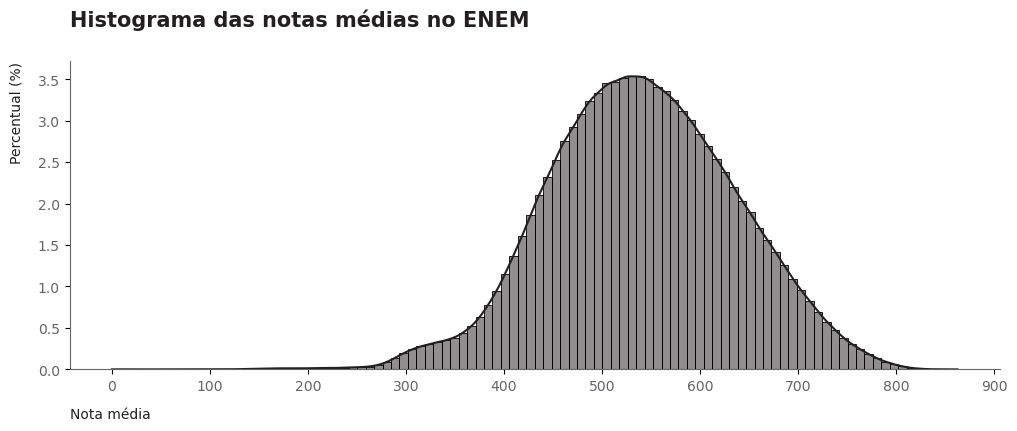

In [28]:
histogram_plot(performance_df, 'nota_media', 'Histograma das notas médias no ENEM',
               'Nota média', 'Percentual (%)', label_color=CINZA1, spines_ticks_colors=CINZA4, hist_color=CINZA1, 
               figsize=(12, 4), bins=100, title_pad=25, title_size=15, labelpad=10, kde=True)

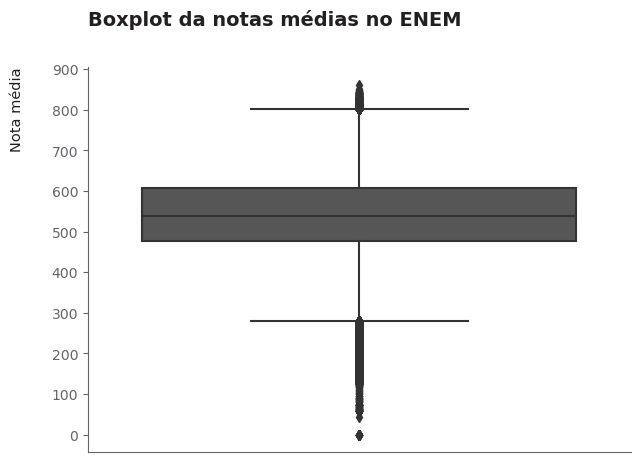

In [6]:
univariate_boxplot(performance_df, y='nota_media', xlabel='', ylabel='Nota média', title='Boxplot da notas médias no ENEM', 
        figsize=(7, 5), xaxis=False, pad=30, boxplot_color=CINZA3, y_step=100, title_size=14, label_size=10.5, tick_size=10)

- Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo, e candidatos que gabaritam a prova, ficando com uma nota elevada. Portanto, outliers não serão removidos.

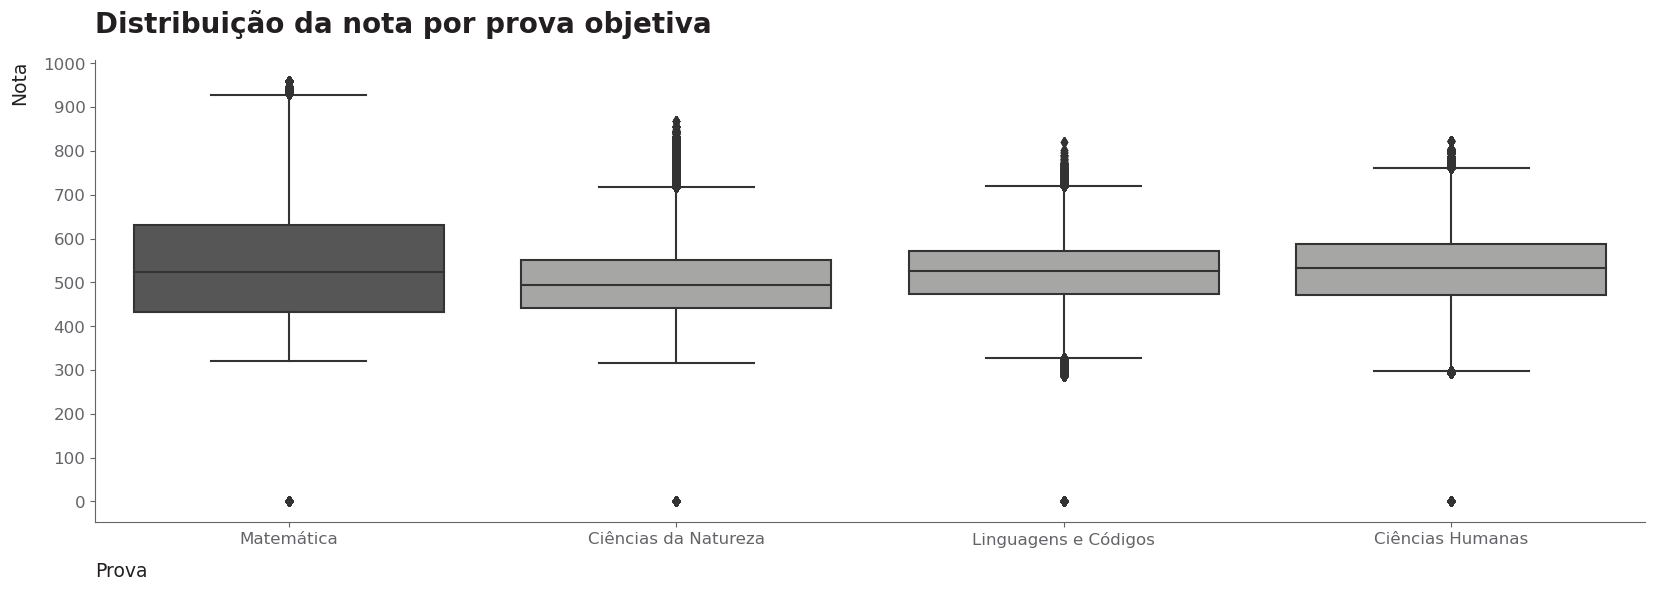

In [7]:
objective_exams = performance_df[['nota_mt', 'nota_cn', 'nota_lc', 'nota_ch']]

bivariate_boxplot(objective_exams, title='Distribuição da nota por prova objetiva', 
        xlabel='Prova', xtick_range=range(4), xtick_labels=['Matemática',
                                                            'Ciências da Natureza',
                                                            'Linguagens e Códigos', 
                                                            'Ciências Humanas'],
        ylabel='Nota', ytick_labels=range(0, 1001, 100), y_step=100, figsize=(20, 6), title_size=20, labelpad=10,
        label_size=13.5, tick_size=12, boxplot_palette=[CINZA3, CINZA8, CINZA8, CINZA8])

- Analisando as distribuições, os candidatos tendem a ir melhor nas provas do primeiro dia, sendo ciências da natureza a área do conhecimento em que é apresentado o pior desempenho. Matemática apresenta o melhor desempenho médio entre as provas. Entretanto, isso se deve ao modelo do ENEM, em que naturalmente essa área do conhecimento fornece uma nota maior aos candidatos. Isso pode ser verificado observando a nota máxima em matemática, que é consideravelmente maior em relação as outras.
- De forma geral, todas as notas apresentam outliers acima e abaixo dos limites superior e inferior. Entretanto, estes não representam informação incoerente, uma vez que naturalmente alguns candidatos irão tirar zero (apesar de estarem presentes, provavelmente esses candidatos deixaram o gabarito em branco, ou algo relacionado), enquanto outros irão gabaritar a prova, atingindo a nota máxima. Portanto, outliers não serão removidos.

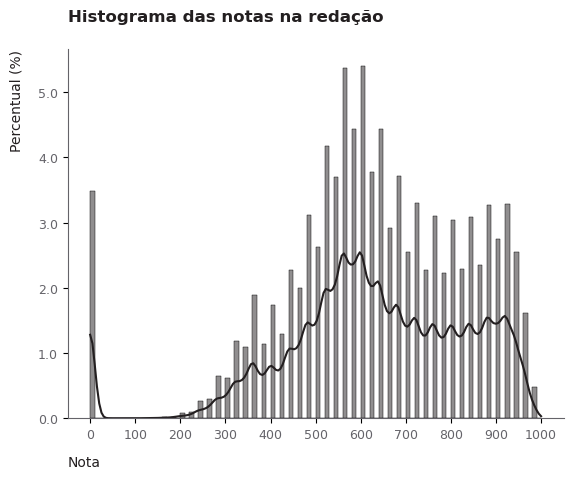

In [8]:
histogram_plot(performance_df, 'nota_redacao', title='Histograma das notas na redação',
               xlabel='Nota', ylabel='Percentual (%)', hist_color=CINZA1, labelpad=10,
               label_size=10, tick_size=9, bins=100)

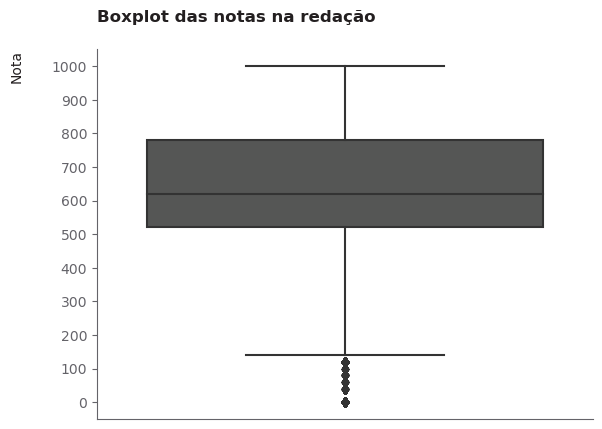

In [9]:
univariate_boxplot(performance_df, title='Boxplot das notas na redação', y='nota_redacao',
                   xlabel='', ylabel='Nota', xaxis=False, y_step=100, boxplot_color=CINZA3)

- Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo e dos pontos citados acima. Portanto, outliers não serão removidos.

In [10]:
performance_df['lingua'].value_counts(normalize=True).to_frame() * 100

,proportion
lingua,
Inglês,57.756816
Espanhol,42.243184


- A maioria dos alunos escolhe o Inglês como língua estrangeira para realizar a prova.

#### 4.4 Distribuição das variáveis socioeconômicas

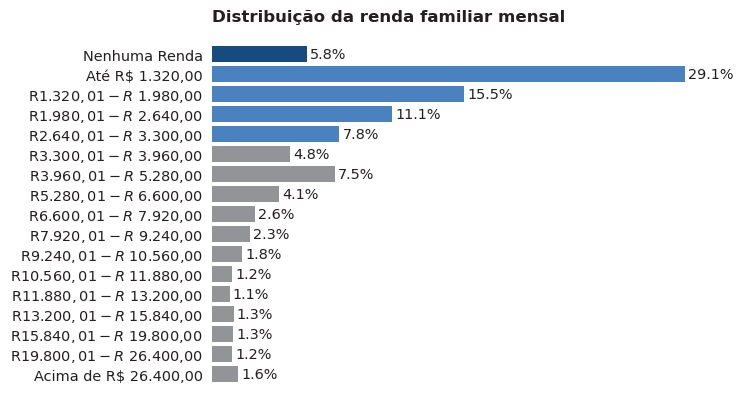

In [16]:
# Group the data by income.
income_grouped = performance_df.groupby(['renda_familiar_mensal'])[['renda_familiar_mensal']].count().rename(columns={'renda_familiar_mensal': 'count'}).reset_index()
income_grouped['pct'] = round(income_grouped['count'] / np.sum(income_grouped['count']) * 100, 2) 
income_grouped['income_unique'] = income_grouped['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grouped = income_grouped.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grouped, 'renda_familiar_mensal', 'pct',
          'Distribuição da renda familiar mensal', 
          ytick_range=range(len(income_grouped)), invert_yaxis=True, text_space=0.2, bar_color=[AZUL1] + [AZUL2]*4 + [CINZA7]*12 + [AZUL1]*2)

- É possível perceber que 70% dos candidatos possuem uma renda familiar mensal de até R$ 3300.00, incluindo aqueles que não possuem nenhuma renda (5.8%).

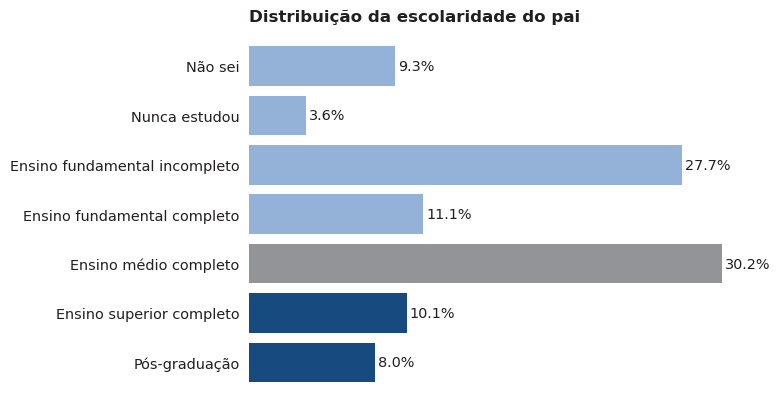

In [17]:
# Group the data by escolaridade pai.
esc_pai_grouped = performance_df.groupby(['escolaridade_pai'])[['escolaridade_pai']].count().rename(columns={'escolaridade_pai': 'count'}).reset_index()
esc_pai_grouped['pct'] = round(esc_pai_grouped['count'] / np.sum(esc_pai_grouped['count']) * 100, 2) 
esc_pai_grouped['order_escolaridade'] = esc_pai_grouped['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grouped = esc_pai_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_pai_grouped, 'escolaridade_pai', 'pct',
          title='Distribuição da escolaridade do pai', ytick_range=range(len(esc_pai_grouped)),
          invert_yaxis=True, text_space=0.2, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

- É possível perceber que mais da metade (51.7 %) dos pais dos candidatos não possuem ensino médio completo. Ademais, aproximadamente 18% chegaram a concluir o ensino superior. Chama a atenção o alto percentual de pais que não concluíram o ensino fundamental, representando 27.7% da amostra.

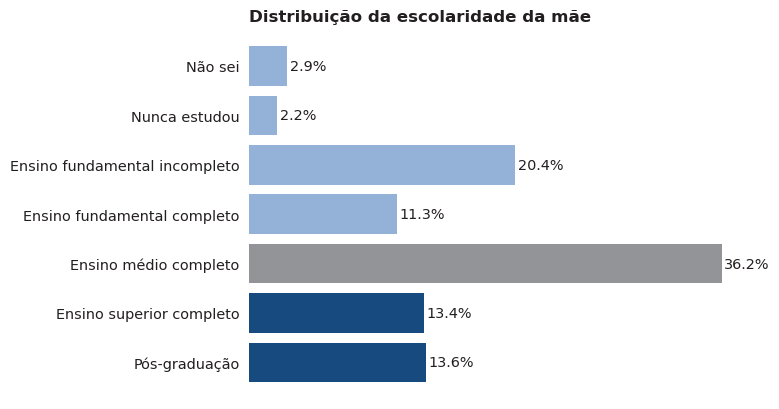

In [19]:
# Group the data by escolaridade mae.
esc_mae_grouped = performance_df.groupby(['escolaridade_mae'])[['escolaridade_mae']].count().rename(columns={'escolaridade_mae': 'count'}).reset_index()
esc_mae_grouped['pct'] = round(esc_mae_grouped['count'] / np.sum(esc_mae_grouped['count']) * 100, 2) 
esc_mae_grouped['order_escolaridade'] = esc_mae_grouped['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grouped = esc_mae_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_mae_grouped, 'escolaridade_mae', 'pct',
          title='Distribuição da escolaridade da mãe', ytick_range=range(len(esc_mae_grouped)),
          invert_yaxis=True, text_space=0.2, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

- É possível perceber que 37% das mães dos candidatos não chegaram a concluir o ensino médio. Entretanto, o nível de escolaridade das mães é claramente superior ao dos pais. Para elas, 27% chegaram a concluir o ensino superior, contra 18% para os pais, por exemplo. Ademais, um percentual considerável possui ensino médio completo, 36.2%.

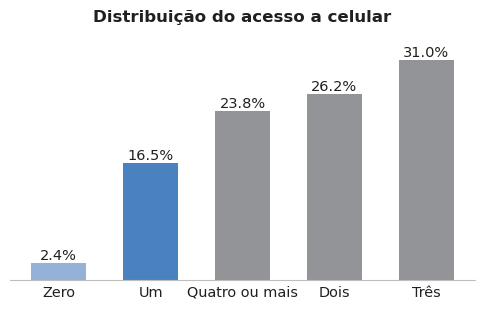

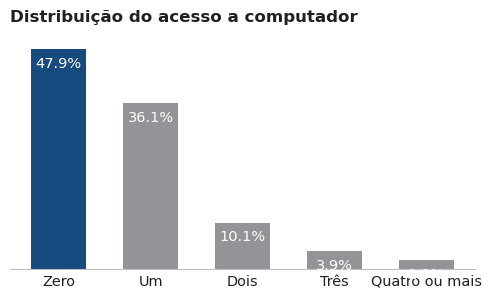

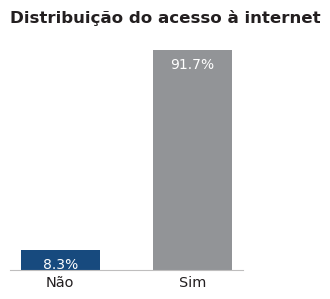

In [44]:
# Group the data by numero_celulares_em_casa.
celular_grouped = performance_df.groupby(['numero_celulares_em_casa'])[['numero_celulares_em_casa']].count().rename(columns={'numero_celulares_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
celular_grouped['pct'] = round(celular_grouped['count'] / np.sum(celular_grouped['count']) * 100, 2) 
celular_grouped = celular_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(celular_grouped, 'numero_celulares_em_casa', 'pct', 
         title='Distribuição do acesso a celular', xlabel='',
         figsize=(6, 3), top_annotation=True, title_pad=20,
         bar_color=[AZUL3, AZUL2, CINZA7, CINZA7, CINZA7], title_loc='center')

# Group the data by numero_computadores_em_casa.
computador_grouped = performance_df.groupby(['numero_computadores_em_casa'])[['numero_computadores_em_casa']].count().rename(columns={'numero_computadores_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
computador_grouped['pct'] = round(computador_grouped['count'] / np.sum(computador_grouped['count']) * 100, 2) 

bar_plot(computador_grouped, 'numero_computadores_em_casa', 'pct', 
         title='Distribuição do acesso a computador', xlabel='',
         figsize=(6, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7, CINZA7, CINZA7, CINZA7], title_loc='left', )

# Group the data by possui_acesso_a_internet_em_casa.
internet_grouped = performance_df.groupby(['possui_acesso_a_internet_em_casa'])[['possui_acesso_a_internet_em_casa']].count().rename(columns={'possui_acesso_a_internet_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
internet_grouped['pct'] = round(internet_grouped['count'] / np.sum(internet_grouped['count']) * 100, 2) 
internet_grouped = internet_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(internet_grouped, 'possui_acesso_a_internet_em_casa', 'pct', 
         title='Distribuição do acesso à internet', xlabel='',
         figsize=(3, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7], title_loc='left', text_fontsize=10)

- Surpreendentemente, 47.9% dos candidatos não possuem computador em casa. Esse dado nos revela uma dificuldade e disparidade de condições dos estudantes, já que um computador com acesso a internet é a melhor ferramenta para estudos atualmente. Será que há uma diferença significativa nas notas daqueles que possuem computador em casa em relação aos que não detêm esse bem?
- 81% dos candidatos possuem dois celulares ou mais em casa. Este é um bem mais acessível e portanto mais comum nas famílias.
- 91.7% dos candidatos possuem acesso a internet em casa. Embora seja um baixo percentual, ainda é alarmante o fato de que aproximadamente 8% dos estudantes não possuem sequer internet para se preparar. Considerando um exame desse porte, isso representa um grande número de pessoas.

#### 5. Análises bivariada e multivariada
- Nesta etapa realizarei agregações e manipulações nos dados de forma a responder perguntas envolvendo duas ou mais variáveis.
- Agora, dividirei a minha análise em Análise de Desempenho e Análise de Abstenção, a fim de responder as perguntas mencionadas no começo deste notebook.

#### 6. Análise de Desempenho
- Entre os objetivos da Análise de Desmpenho estão, entender qual o perfil dos candidatos que obtêm determinados resultados e quais variáveis se relacionam com a nota geral.
- A métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação. 
- Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo.
- Perguntas respondidas na Análise de Desempenho:
    - Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
    - Em média, quais os estados com as maiores e as menores notas gerais?
    - Como a renda influencia o desempenho do candidato?
    - Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
    - Como a ocupação do pai e da mãe influenciam a nota geral do candidato?
    - De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho do candidato?
    - De que forma o tipo de escola (pública ou privada) influencia o desempenho do candidato?
    - Existe alguma correlação entre o número de pessoas em casa e a nota geral do candidato?

#### 6.1 Existem diferenças no desempenho para pessoas de diferentes faixas etárias?

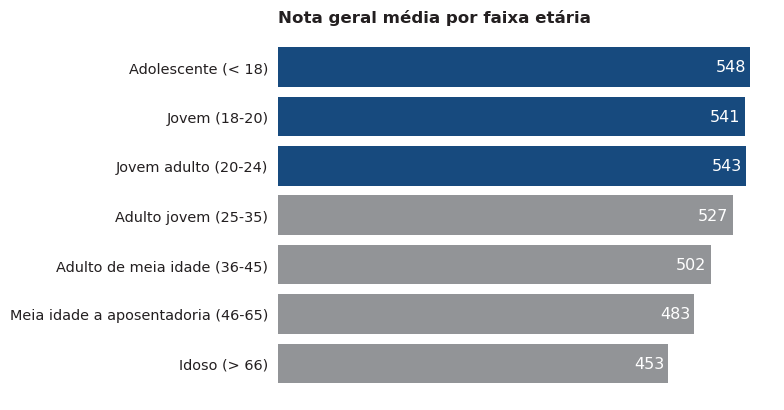

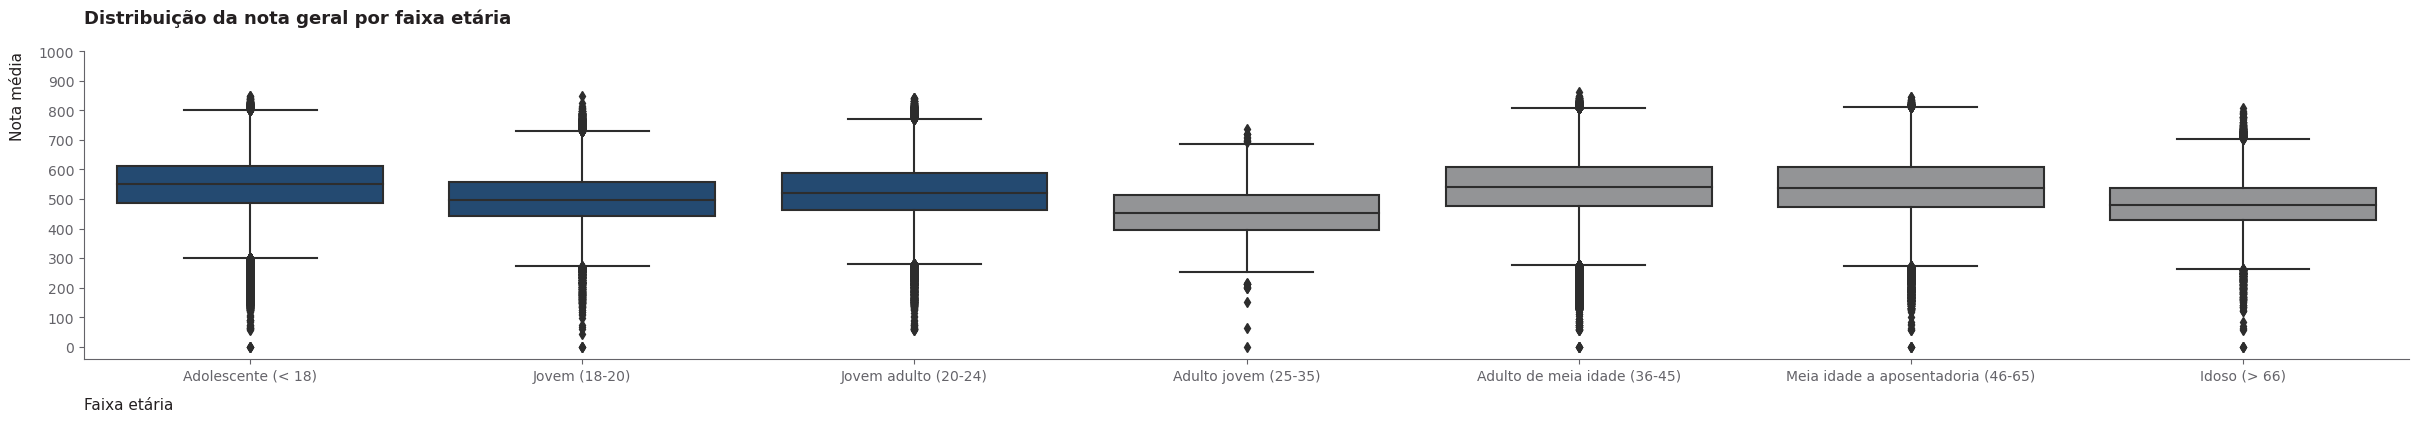

In [47]:
age_grade = performance_df.groupby(['faixa_etaria'])[['nota_media']].mean().reset_index()
age_grade['limit_age'] = age_grade['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grade = age_grade.sort_values(by=['limit_age'], ascending=True).reset_index(drop=True)

barh_plot(age_grade, 'faixa_etaria', 'nota_media',
          title='Nota geral média por faixa etária', ytick_range=range(len(age_grade)),
          invert_yaxis=True, text_space=-40, text_color=BRANCO, text_size=11.5, mean=True,
          bar_color=[AZUL1]*3 + [CINZA7]*4)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por faixa etária',  
                  xtick_labels=age_grade['faixa_etaria'].unique().tolist(),
                  xlabel='Faixa etária', xtick_range=range(len(age_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1]*3 + [CINZA7]*4,
                  figsize=(30, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='faixa_etaria')

- Em média, pessoas mais jovens tendem a apresentar uma nota geral maior que a de pessoas mais velhas.

#### 6.2 Em média, quais os estados com as maiores e as menores notas gerais?

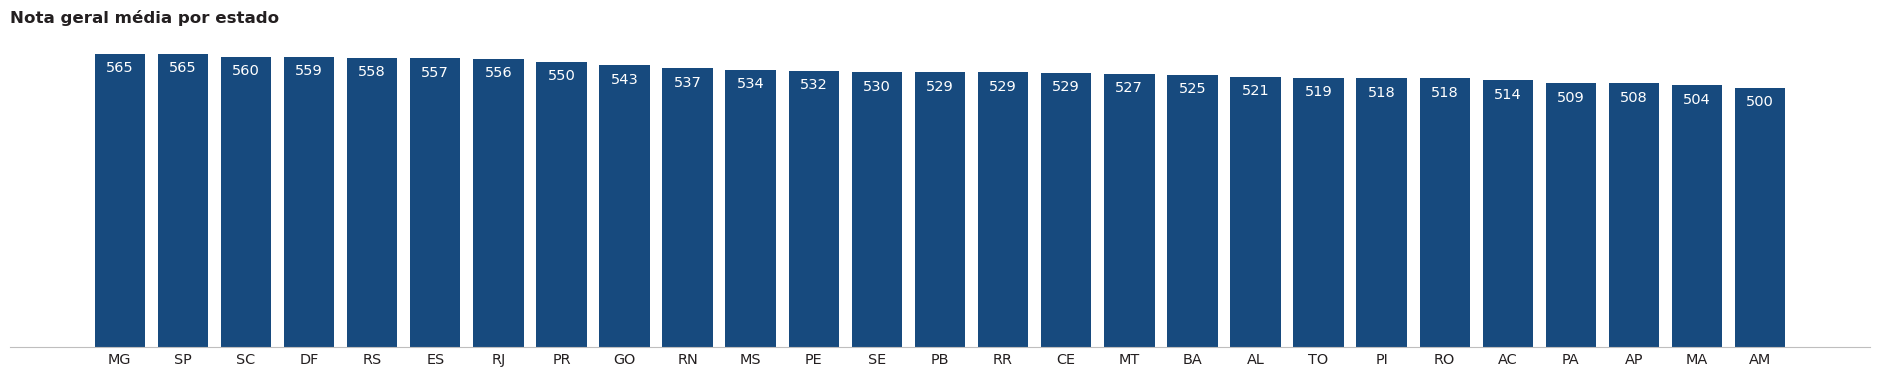

In [48]:
# Group the data by uf.
uf_grade = performance_df.groupby(['uf_prova'])[['nota_media']].mean().reset_index().sort_values(by=['nota_media'], ascending=False)

bar_plot(uf_grade, 'uf_prova', 'nota_media', 
         title='Nota geral média por estado', xlabel='',
         figsize=(24, 4), top_annotation=False, title_pad=12,
         bar_color=AZUL1, title_loc='left', barwidth=0.8, mean=True)

- Em média, estados do sul e sudeste possuem as maiores notas gerais. Com destaque para Minas Gerais e São Paulo, sendo os dois melhores nesse quesito. O Distrito Federal (Brasília) é a exceção dentre as outras regiões, estando em quarto lugar. A diferença torna-se ainda maior à medida que caminhamos para o norte, sendo o Amazonas o estado com a pior nota de todas, estando aproximadamente 65 pontos abaixo de minas.

#### 6.3 Como a renda influencia o desempenho do candidato?

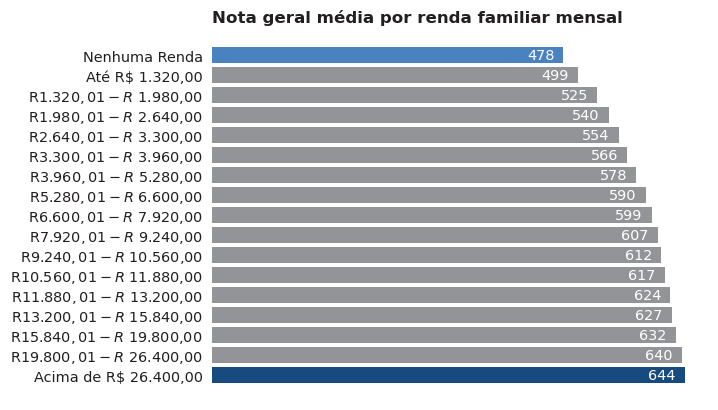

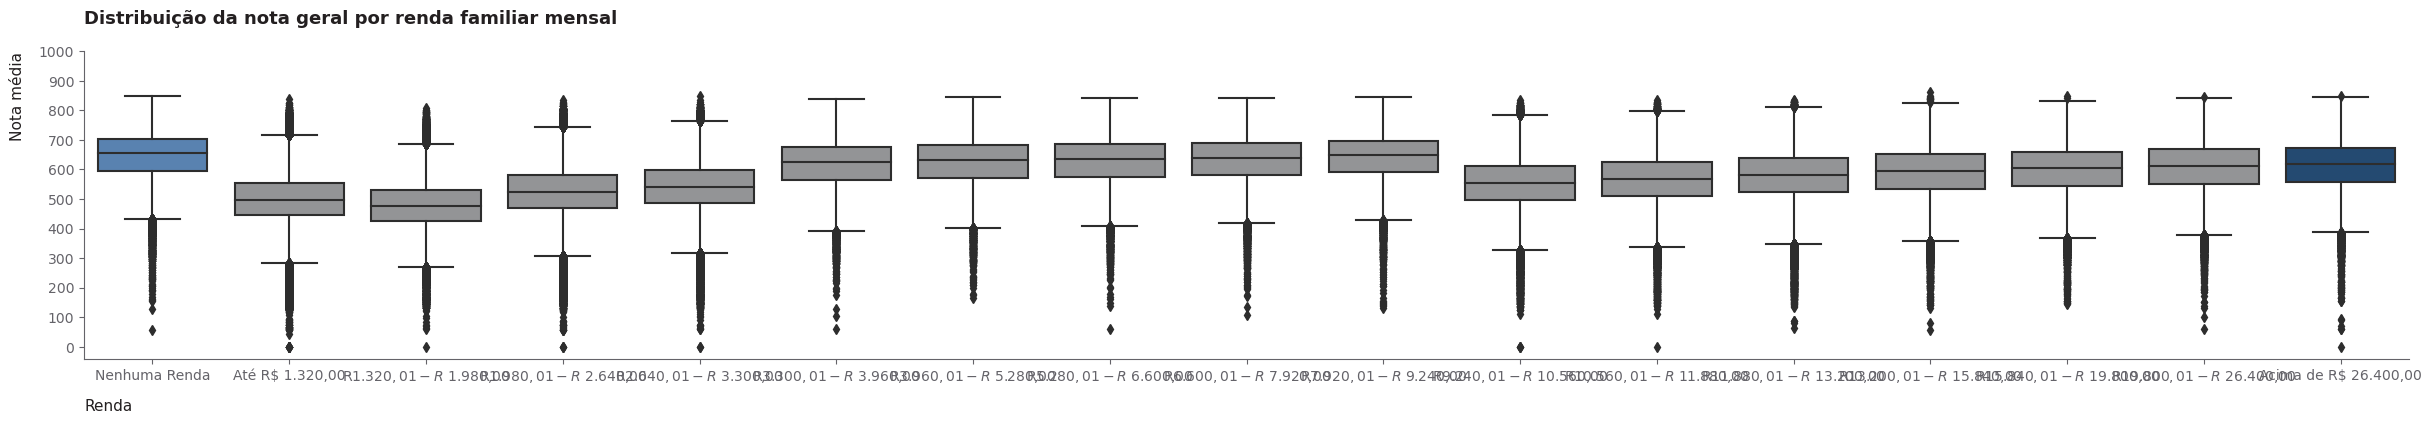

In [155]:
# Group the data by income.
income_grade = performance_df.groupby(['renda_familiar_mensal'])[['nota_media']].mean().reset_index()
income_grade['income_unique'] = income_grade['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grade = income_grade.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grade, 'renda_familiar_mensal', 'nota_media',
          title='Nota geral média por renda familiar mensal', ytick_range=range(len(income_grade)),
          invert_yaxis=True, text_space=-50, text_color=BRANCO, mean=True, bar_color=[AZUL2] + [CINZA7]*15 + [AZUL1])


bivariate_boxplot(performance_df, title='Distribuição da nota geral por renda familiar mensal',  
                  xtick_labels=income_grade['renda_familiar_mensal'].unique().tolist(),
                  xlabel='Renda', xtick_range=range(len(income_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL2] + [CINZA7]*15 + [AZUL1], figsize=(30, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='renda_familiar_mensal')

- É possível perceber que, em média, quanto maior a renda familiar mensal, maior a nota geral do candidato. Candidatos com renda acima de R$ 26.400,00 obtiveram uma nota geral média 1.35 vezes maior que candidatos com nenhuma renda, totalizando uma diferença absoluta de aproximadamente 166 pontos.

#### 6.4 Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?

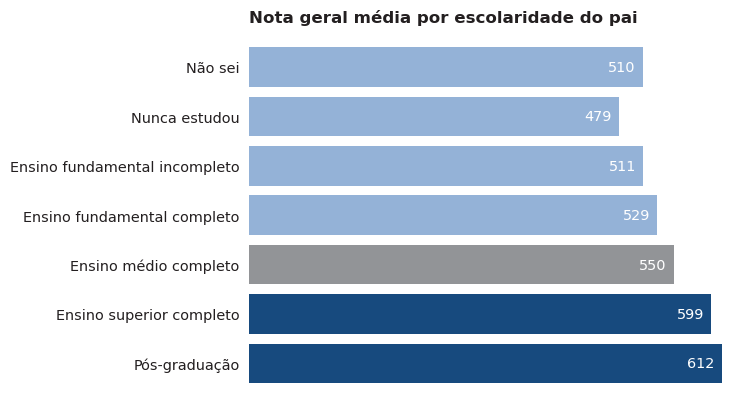

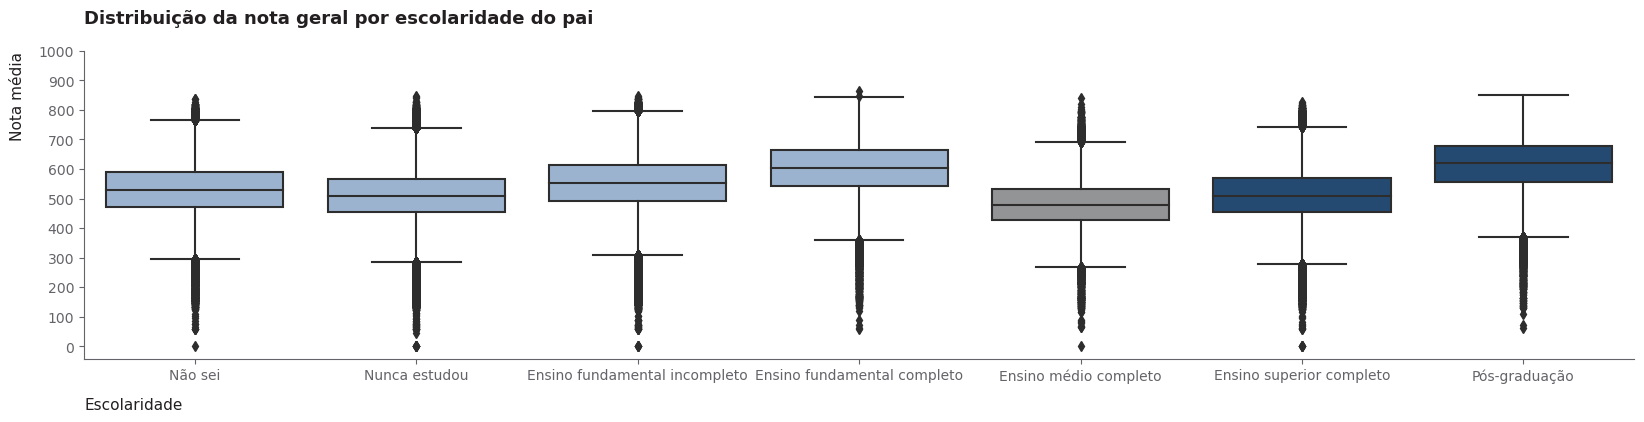

In [57]:
# Group the data by escolaridade pai.
esc_pai_grade = performance_df.groupby(['escolaridade_pai'])[['nota_media']].mean().reset_index()
esc_pai_grade['order_escolaridade'] = esc_pai_grade['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grade = esc_pai_grade.sort_values(by=['order_escolaridade'], ascending=True)


barh_plot(esc_pai_grade, 'escolaridade_pai', 'nota_media',
          title='Nota geral média por escolaridade do pai', ytick_range=range(len(esc_pai_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por escolaridade do pai',  
                  xtick_labels=esc_pai_grade['escolaridade_pai'].unique().tolist(),
                  xlabel='Escolaridade', xtick_range=range(len(esc_pai_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3]*4 + [CINZA7] + [AZUL1]*2, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escolaridade_pai')

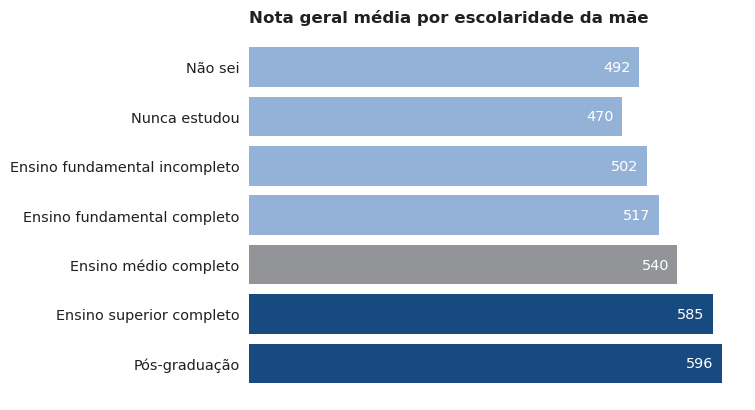

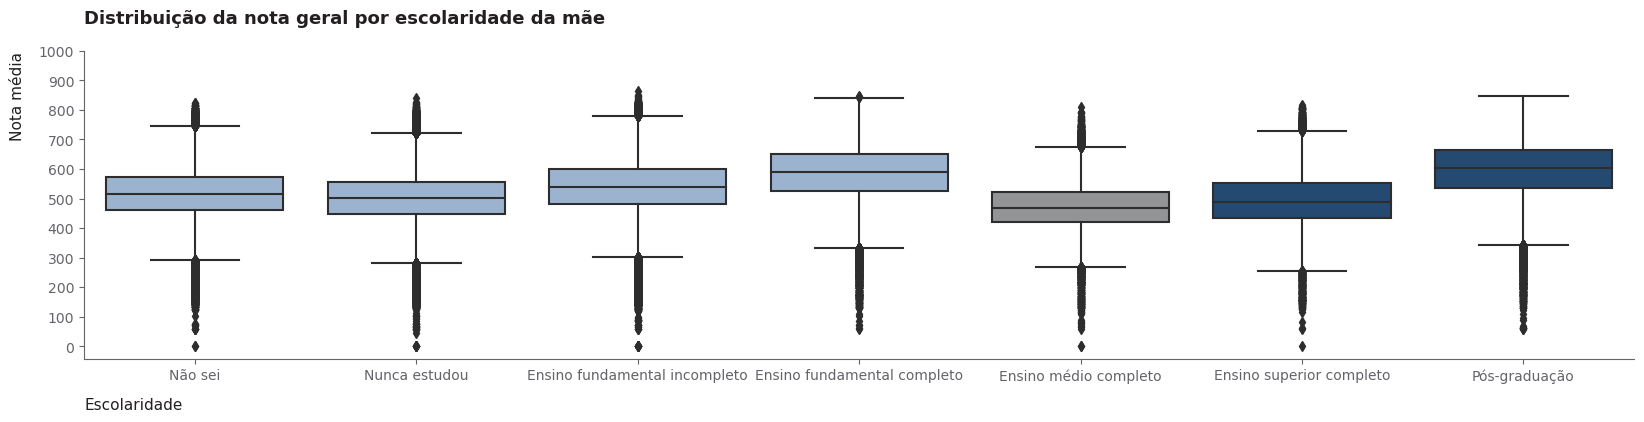

In [58]:
# Group the data by escolaridade pai.
esc_mae_grade = performance_df.groupby(['escolaridade_mae'])[['nota_media']].mean().reset_index()
esc_mae_grade['order_escolaridade'] = esc_mae_grade['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grade = esc_mae_grade.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_mae_grade, 'escolaridade_mae', 'nota_media',
          title='Nota geral média por escolaridade da mãe', ytick_range=range(len(esc_mae_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)


bivariate_boxplot(performance_df, title='Distribuição da nota geral por escolaridade da mãe',  
                  xtick_labels=esc_mae_grade['escolaridade_mae'].unique().tolist(),
                  xlabel='Escolaridade', xtick_range=range(len(esc_pai_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3]*4 + [CINZA7] + [AZUL1]*2, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escolaridade_mae')

- Claramente, quanto maior a escolaridade do pai ou da mãe, melhor o desempenho do candidato, apesar de haver outliers nas distribuições.

#### 6.5 De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho dos candidatos?

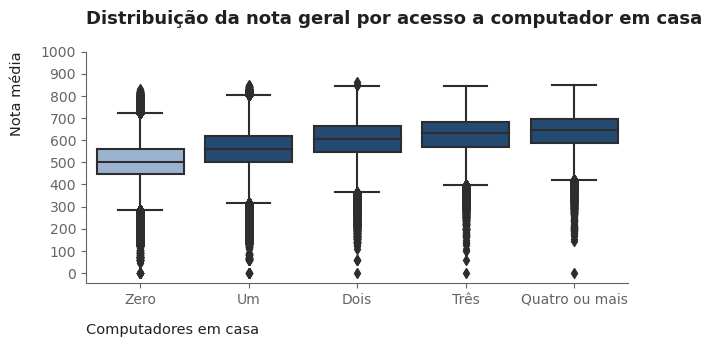

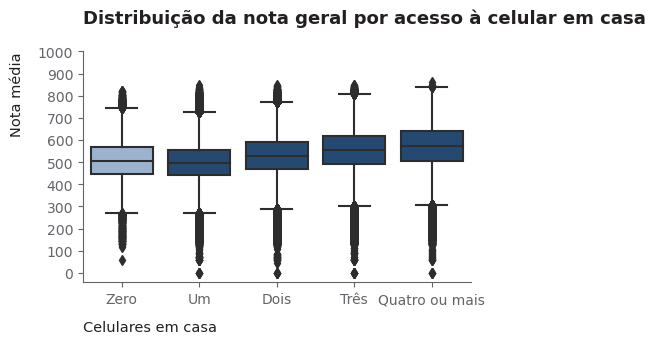

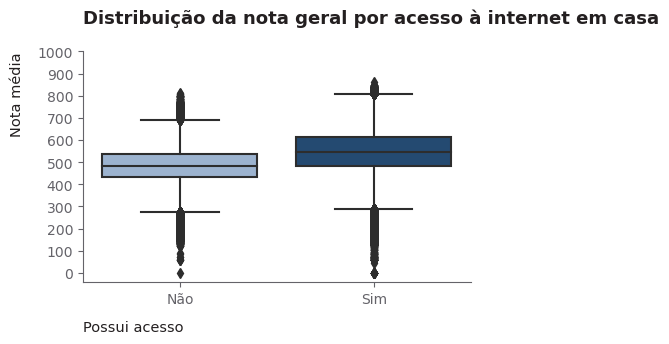

In [71]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso a computador em casa', 
        xlabel='Computadores em casa', xtick_range=range(5), xtick_labels=['Zero', 'Um', 'Dois', 'Três', 'Quatro ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3, AZUL1, AZUL1, AZUL1, AZUL1], figsize=(7, 3), title_size=13, labelpad=12,
        label_size=10.5, tick_size=10, y='nota_media', x='numero_computadores_em_casa', order=['Zero', 'Um', 'Dois', 'Três', 'Quatro ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso à celular em casa', 
        xlabel='Celulares em casa', xtick_range=range(5), xtick_labels=['Zero', 'Um', 'Dois', 'Três', 'Quatro ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3, AZUL1, AZUL1, AZUL1, AZUL1], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='numero_celulares_em_casa', order=['Zero', 'Um', 'Dois', 'Três', 'Quatro ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso à internet em casa', 
        xlabel='Possui acesso', xtick_range=range(2), xtick_labels=['Não', 'Sim'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3, AZUL1], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='possui_acesso_a_internet_em_casa', order=['Não', 'Sim'])

- Candidatos com um ou mais celulares em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
- Candidatos com um ou mais computadores em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
- Candidatos com acesso a internet em casa tendem a obter uma nota geral maior que aqueles que não possuem o recurso.

#### 6.6 Em quais regiões estão concentrados os alunos que não possuem acesso a recursos tecnológicos (celular, computador e internet) em casa?

In [72]:
# Create a feature indicating the state's region.
def define_regions(states):
    region_mapping = {
                        'AC': 'Norte',
                        'AL': 'Nordeste',
                        'AP': 'Norte',
                        'AM': 'Norte',
                        'BA': 'Nordeste',
                        'CE': 'Nordeste',
                        'DF': 'Centro-Oeste',
                        'ES': 'Sudeste',
                        'GO': 'Centro-Oeste',
                        'MA': 'Nordeste',
                        'MT': 'Centro-Oeste',
                        'MS': 'Centro-Oeste',
                        'MG': 'Sudeste',
                        'PA': 'Norte',
                        'PB': 'Nordeste',
                        'PR': 'Sul',
                        'PE': 'Nordeste',
                        'PI': 'Nordeste',
                        'RJ': 'Sudeste',
                        'RN': 'Nordeste',
                        'RS': 'Sul',
                        'RO': 'Norte',
                        'RR': 'Norte',
                        'SC': 'Sul',
                        'SP': 'Sudeste',
                        'SE': 'Nordeste',
                        'TO': 'Norte'
                    }

    
    regions = [region_mapping[state] for state in states]
    return regions

performance_df['regiao'] = define_regions(performance_df['uf_prova'])
performance_df['regiao'].unique()

array(['Sul', 'Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste'],
      dtype=object)

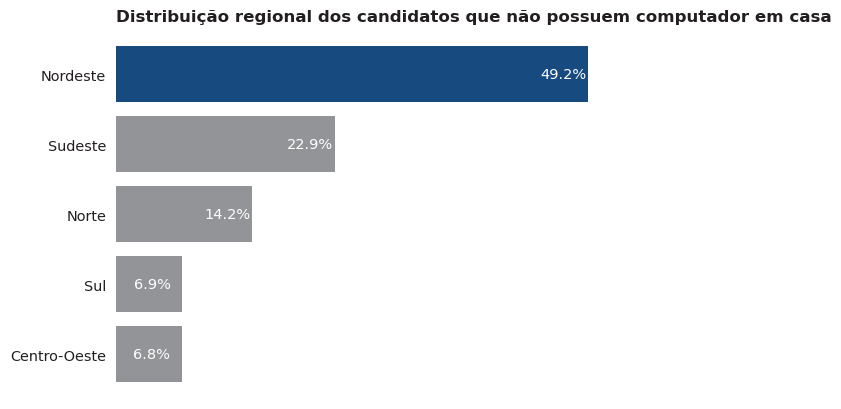

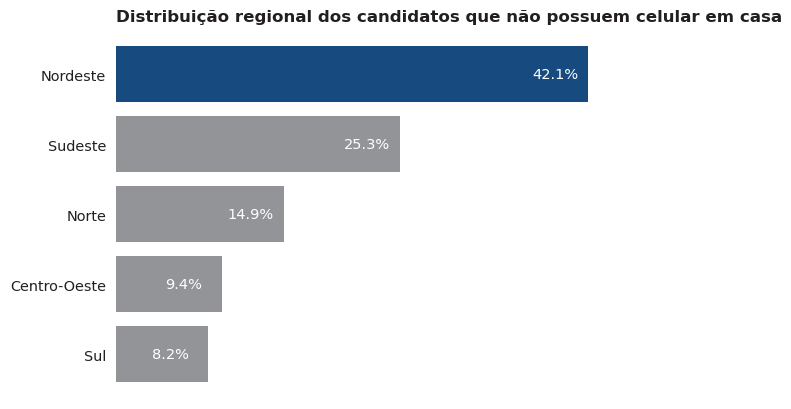

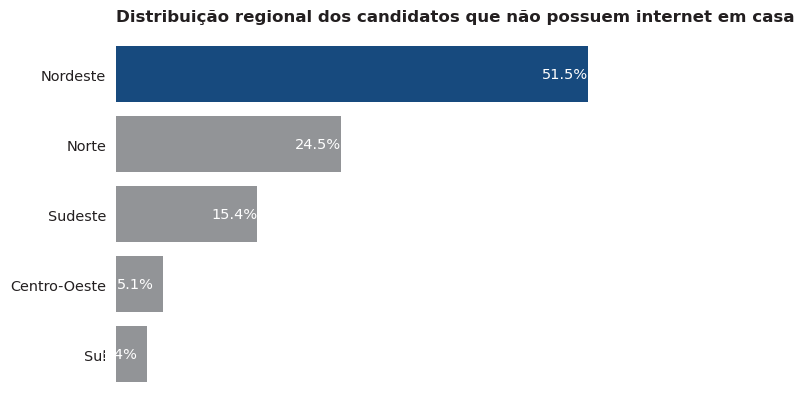

In [73]:
# Obtain and group the data by numero_computadores_em_casa, numero_celulares_em_casa e possui_acesso_a_internet_em_casa
nao_pc = performance_df.loc[df['numero_computadores_em_casa'] == 'Zero']
nao_celular = performance_df.loc[df['numero_celulares_em_casa'] == 'Zero']
nao_internet = performance_df.loc[df['possui_acesso_a_internet_em_casa'] == 'Não']

nao_pc_grouped = nao_pc.groupby(['regiao'])[['numero_computadores_em_casa']].count().reset_index().rename(columns={'numero_computadores_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_pc_grouped['pct'] = round(nao_pc_grouped['count'] / np.sum(nao_pc_grouped['count']) * 100, 2) 

nao_celular_grouped = nao_celular.groupby(['regiao'])[['numero_celulares_em_casa']].count().reset_index().rename(columns={'numero_celulares_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_celular_grouped['pct'] = round(nao_celular_grouped['count'] / np.sum(nao_celular_grouped['count']) * 100, 2) 

nao_internet_grouped = nao_internet.groupby(['regiao'])['possui_acesso_a_internet_em_casa'].count().reset_index().rename(columns={'possui_acesso_a_internet_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_internet_grouped['pct'] = round(nao_internet_grouped['count'] / np.sum(nao_internet_grouped['count']) * 100, 2)

barh_plot(nao_pc_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem computador em casa', ytick_range=range(len(nao_pc_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.5, text_color=BRANCO, bar_color=[AZUL1] + [CINZA7]*4)

barh_plot(nao_celular_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem celular em casa', ytick_range=range(len(nao_celular_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.5, text_color=BRANCO, bar_color=[AZUL1] + [CINZA7]*4)

barh_plot(nao_internet_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem internet em casa', ytick_range=range(len(nao_internet_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.5, text_color=BRANCO, bar_color=[AZUL1] + [CINZA7]*4)

- Metade dos candidatos que não possuem acesso a internet e computador em casa são da região nordeste do país. Para celular em casa, a taxa é similar, de 42.1%.

#### 6.7 De que forma o tipo de escola (pública ou privada) influencia o desempenho do candidato?

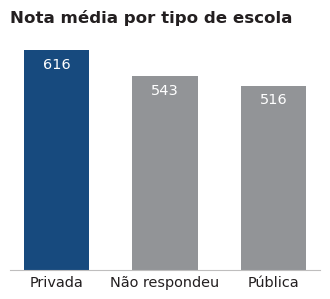

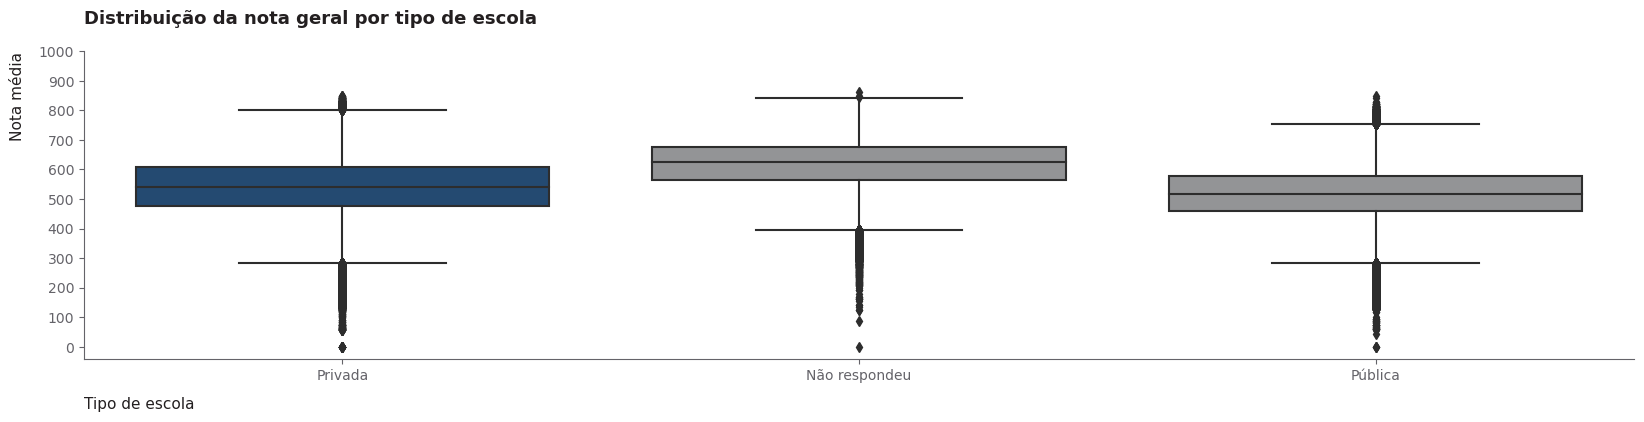

In [74]:
# Group the data by escola.
esc_grade = performance_df.groupby(['escola'])[['nota_media']].mean().reset_index()
esc_grade = esc_grade.sort_values(by=['nota_media'], ascending=False)

bar_plot(esc_grade, 'escola', 'nota_media', 
         title='Nota média por tipo de escola', xlabel='',
         figsize=(4, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7, CINZA7], title_loc='left',
         mean=True)


bivariate_boxplot(performance_df, title='Distribuição da nota geral por tipo de escola',  
                  xtick_labels=esc_grade['escola'].unique().tolist(),
                  xlabel='Tipo de escola', xtick_range=range(len(esc_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, CINZA7, CINZA7], figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escola')

- Em média, alunos de escola privada obtêm uma nota média 100 pontos acima que a de alunos de escola pública.

#### 6.8 Existe alguma correlação entre o número de pessoas em casa e a nota geral do candidato?

In [76]:
corr = performance_df[['nota_media', 'numero_pessoas_em_casa']].corr()
corr

,nota_media,numero_pessoas_em_casa
nota_media,1.000000,-0.075678
numero_pessoas_em_casa,-0.075678,1.000000


- Não há correlação entre a nota geral do candidato e o número de pessoas em casa.

#### 6.9 Como a ocupação do pai e da mãe influenciam a nota geral do candidato?

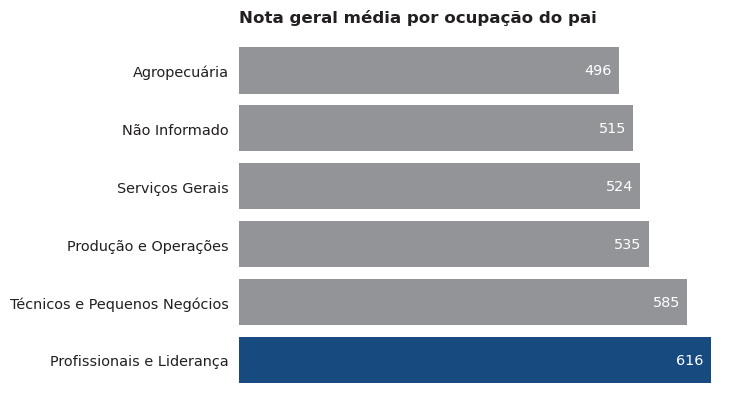

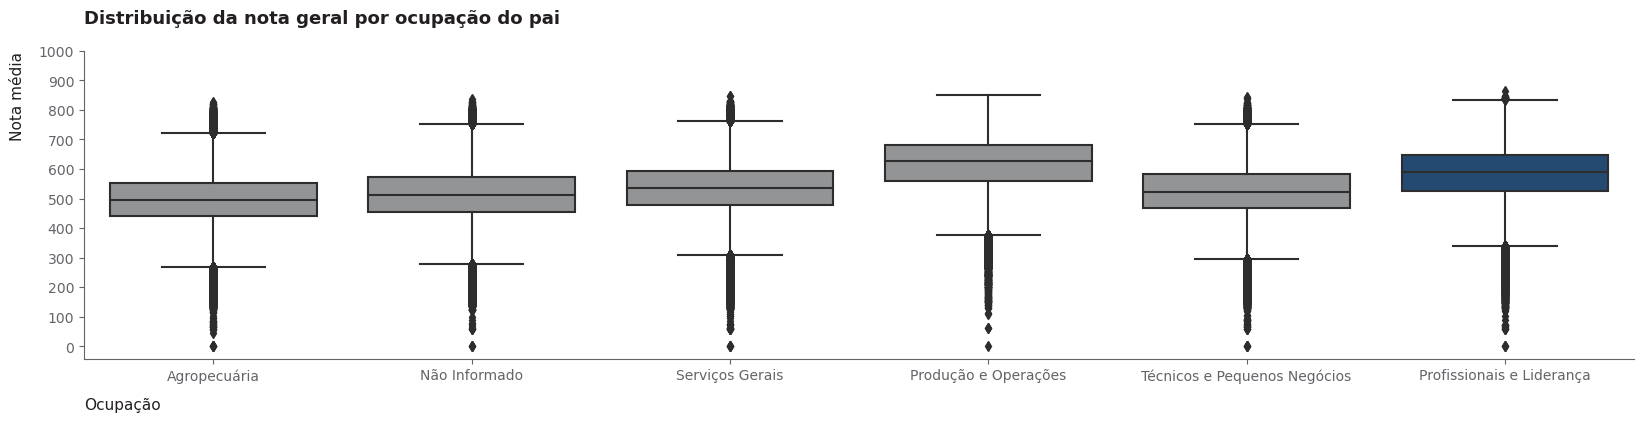

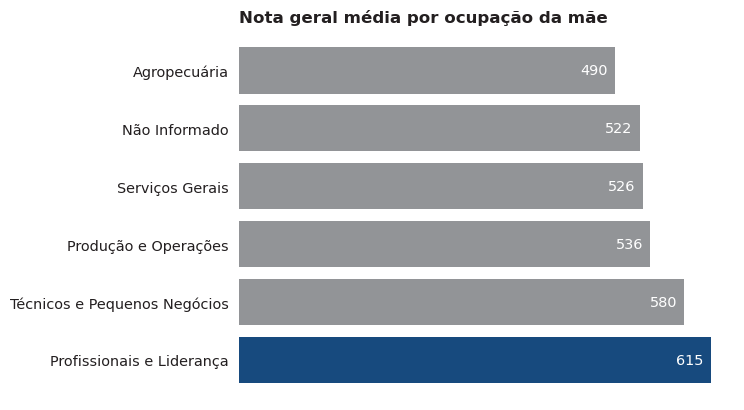

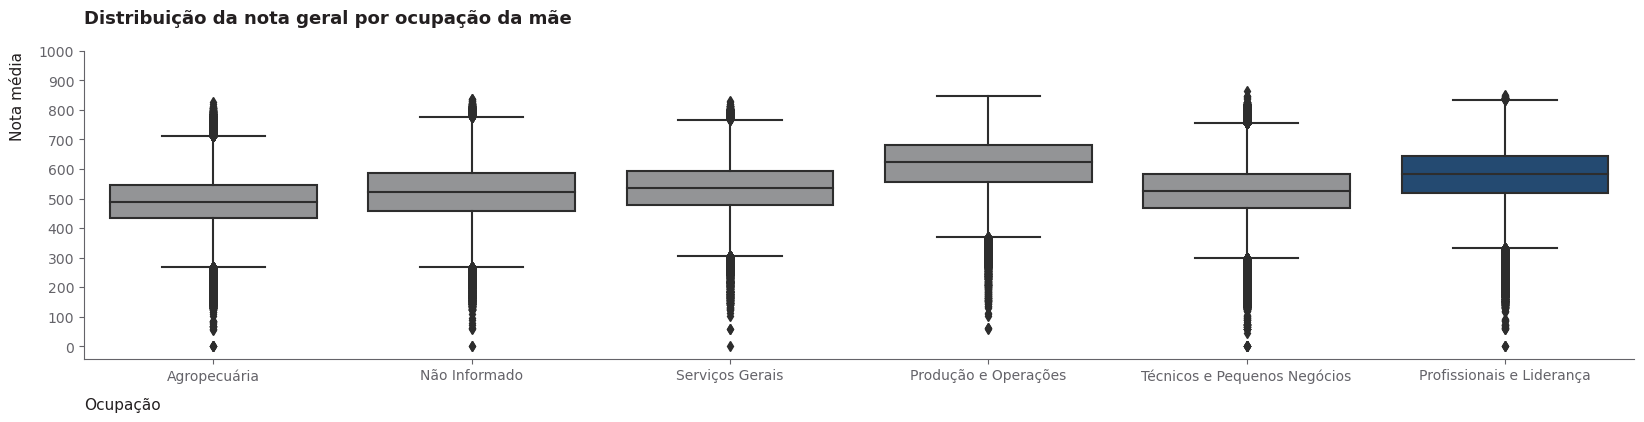

In [119]:
# Group the data by ocupacao pai.
oc_pai_grade = performance_df.groupby(['ocupacao_pai'])[['nota_media']].mean().reset_index()
oc_pai_grade = oc_pai_grade.sort_values(by=['nota_media'], ascending=True)

barh_plot(oc_pai_grade, 'ocupacao_pai', 'nota_media',
          title='Nota geral média por ocupação do pai', ytick_range=range(len(oc_pai_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[CINZA7]*5 + [AZUL1]*1)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por ocupação do pai',  
                  xtick_labels=oc_pai_grade['ocupacao_pai'].unique().tolist(),
                  xlabel='Ocupação', xtick_range=range(len(oc_pai_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[CINZA7]*5 + [AZUL1]*1, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='ocupacao_pai')

# Group the data by ocupacao mae.
oc_mae_grade = performance_df.groupby(['ocupacao_mae'])[['nota_media']].mean().reset_index()
oc_mae_grade = oc_mae_grade.sort_values(by=['nota_media'], ascending=True)

barh_plot(oc_mae_grade, 'ocupacao_mae', 'nota_media',
          title='Nota geral média por ocupação da mãe', ytick_range=range(len(oc_mae_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[CINZA7]*5 + [AZUL1]*1)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por ocupação da mãe',  
                  xtick_labels=oc_mae_grade['ocupacao_mae'].unique().tolist(),
                  xlabel='Ocupação', xtick_range=range(len(oc_mae_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[CINZA7]*5 + [AZUL1]*1, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='ocupacao_mae')

- Claramente, estudantes cujos pais ocupam cargos de maior prestígio social e renda média (tais como médicos, advogados, etc.) tendem a obter notas gerais maiores.

#### 7.0 Analisando a nota geral média em outras variáveis

In [120]:
performance_df.groupby(['lingua'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
lingua,
Inglês,564.022827
Espanhol,508.595703


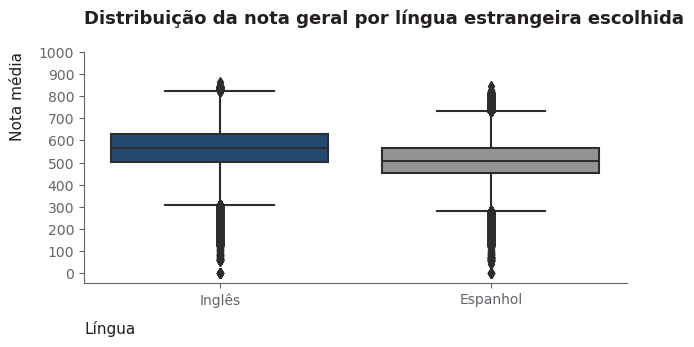

In [121]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por língua estrangeira escolhida',  
                  xtick_labels=['Inglês', 'Espanhol'],
                  xlabel='Língua', xtick_range=range(2),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, CINZA7], figsize=(7, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='lingua', order=['Inglês', 'Espanhol'])

- Candidatos que escolhem inglês como língua estrangeira tendem a ter desempenho melhor.

In [122]:
performance_df.groupby(['treineiro'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
treineiro,
Sim,541.036499
Não,540.507690


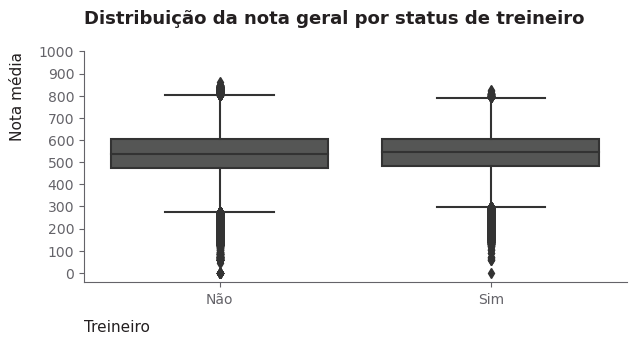

In [123]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por status de treineiro',  
                  xtick_labels=['Não', 'Sim'],
                  xlabel='Treineiro', xtick_range=range(2),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[CINZA3], figsize=(7, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='treineiro')

- Treineiros e não treineiros não apresentam diferenças significativas na distribuição da nota geral.

In [139]:
performance_df.groupby(['numero_pessoas_em_casa'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
numero_pessoas_em_casa,
1 a 3,543.660522
4 a 5,542.911438
6 a 10,508.719635
11 a 20,484.996704


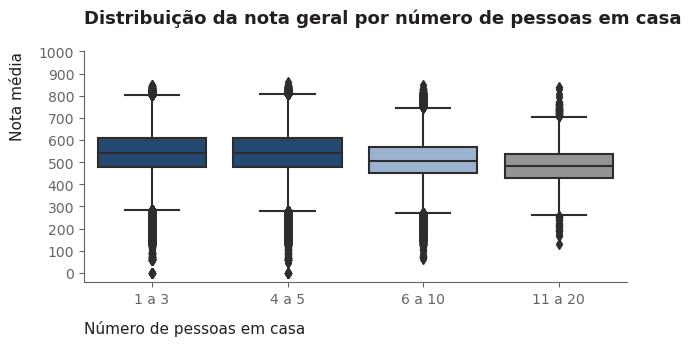

In [82]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por número de pessoas em casa',  
                  xtick_labels=['1 a 3', '4 a 5', '6 a 10', '11 a 20'],
                  xlabel='Número de pessoas em casa', xtick_range=range(4),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, AZUL1, AZUL3, CINZA7], figsize=(7, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='numero_pessoas_em_casa')

- Quanto maior o número de pessoas em casa, menor tende a ser a nota do candidato.

In [83]:
performance_df.groupby(['estado_civil'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
estado_civil,
Solteiro(a),542.970642
Não informado,524.986389
Divorciado(a)/Separado(a),510.822815
Casado(a)/União Estável,509.873474
Viúvo(a),474.827087


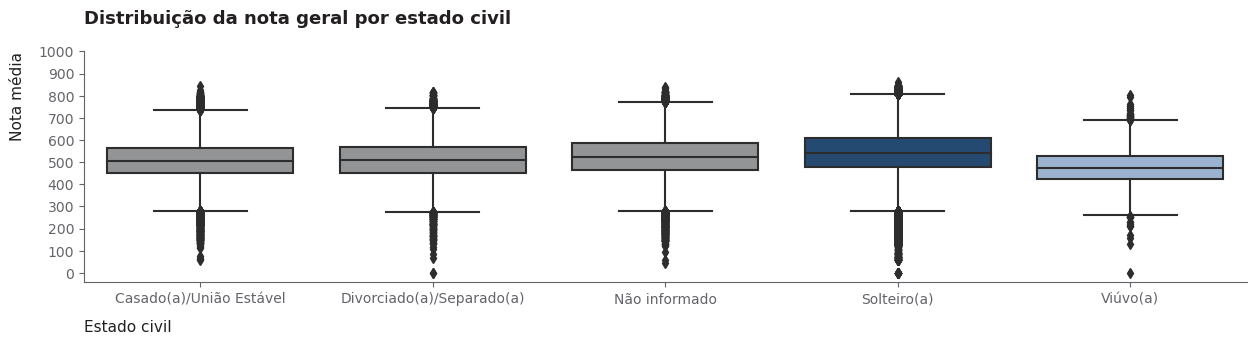

In [84]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por estado civil',  
                  xtick_labels=['Casado(a)/União Estável', 'Divorciado(a)/Separado(a)', 'Não informado', 'Solteiro(a)', 'Viúvo(a)'],
                  xlabel='Estado civil', xtick_range=range(5),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[CINZA7, CINZA7, CINZA7, AZUL1, AZUL3], figsize=(15, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='estado_civil')

- Solteiros tendem a obter as melhores notas, enquanto viúvos as piores.

In [85]:
performance_df.groupby(['status_conclusao_ensino_medio'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
status_conclusao_ensino_medio,
Concluído,544.189087
Cursando,541.036499
Último ano,536.914246
Não concluído,510.968384


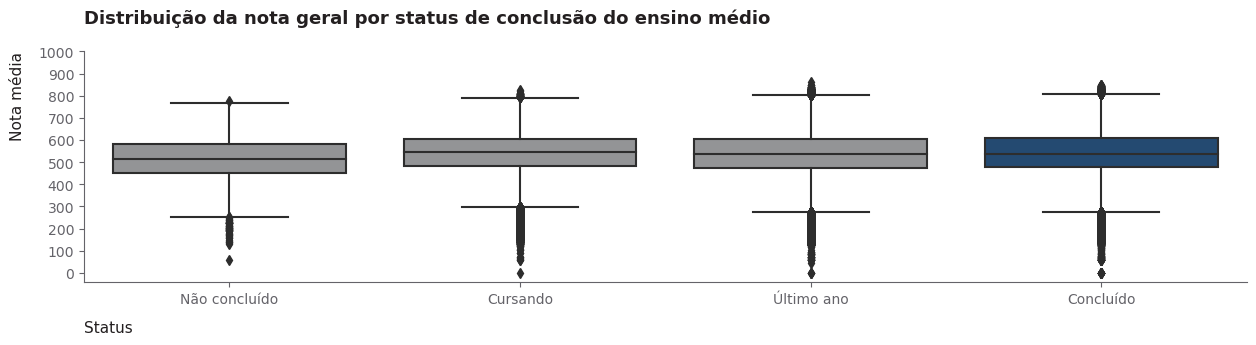

In [86]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por status de conclusão do ensino médio',  
                  xtick_labels=['Não concluído', 'Cursando', 'Último ano', 'Concluído'],
                  xlabel='Status', xtick_range=range(4), order=['Não concluído', 'Cursando', 'Último ano', 'Concluído'],
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[CINZA7, CINZA7, CINZA7, AZUL1, AZUL3], figsize=(15, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='status_conclusao_ensino_medio')

- Em média, quanto maior o status, maior a nota.

#### 7. Análise de Abstenção
- O objetivo da Análise de Abstenção é identificar os fatores que influenciam a ausência do candidato na prova. 
- Portanto, serão utilizados dados de todos os candidatos, dando foco aos que estavam ausentes.
- Perguntas respondidas na Análise de Abstenção:
    - A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
    - A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
    - A renda familiar mensal influencia a ausência do candidato na prova?
    - Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
    - Quais regiões apresentam as maiores e as menores taxas de abstenção?
    - Existe alguma diferença na taxa de abstenção entre alunos de escola pública e privada?
    - A ocupação do pai e da mãe influenciam a ausência do candidato na prova?

#### 7.1 A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?

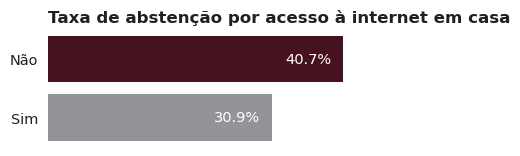

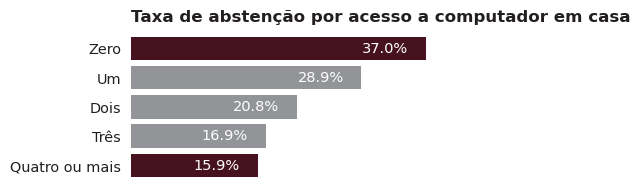

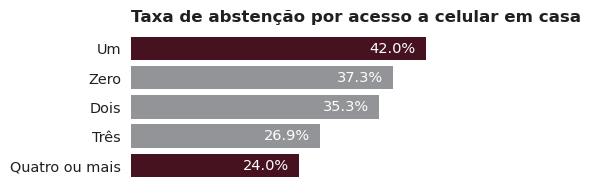

In [161]:
internet_absent = absent_df.groupby(['possui_acesso_a_internet_em_casa'])[['presente']].mean().reset_index()
internet_absent['ausente'] = round((1 - internet_absent['presente']) * 100, 1)

computer_absent = absent_df.groupby(['numero_computadores_em_casa'])[['presente']].mean().reset_index()
computer_absent['ausente'] = round((1 - computer_absent['presente']) * 100, 1)
computer_absent = computer_absent.sort_values(by=['ausente'], ascending=False)

celular_absent = absent_df.groupby(['numero_celulares_em_casa'])[['presente']].mean().reset_index()
celular_absent['ausente'] = round((1 - celular_absent['presente']) * 100, 1)
celular_absent = celular_absent.sort_values(by=['ausente'], ascending=False)

barh_plot(internet_absent, 'possui_acesso_a_internet_em_casa', 'ausente',
          title='Taxa de abstenção por acesso à internet em casa', ytick_range=range(len(internet_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7], figsize=(4, 1.5), 
          text_space=-8)

barh_plot(computer_absent, 'numero_computadores_em_casa', 'ausente',
          title='Taxa de abstenção por acesso a computador em casa', ytick_range=range(len(computer_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7] * 3 + [], figsize=(4, 2), 
          text_space=-8)

barh_plot(celular_absent, 'numero_celulares_em_casa', 'ausente',
          title='Taxa de abstenção por acesso a celular em casa', ytick_range=range(len(celular_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7]*3 + [VERMELHO_FORTE], figsize=(4, 2), 
          text_space=-8)

- Sim, a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciou a ausência do candidato na prova.
- A taxa de abstenção para candidatos que não possuem acesso a internet em casa é de 41%, contra 31% para aqueles que possuem.
- A taxa de abstenção para candidatos que não possuem computador em casa é de 37%, contra 21% e 29% para aqueles que possuem dois e um, respectivamente. É interessante a diferença de mais de 17% na abstenção entre os que não possuem computador e os que possuem dois e até mais.
- A taxa de abstenção para decresce monotonicamente à medida que o número de celulares em casa cresce.

#### 7.2 A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?

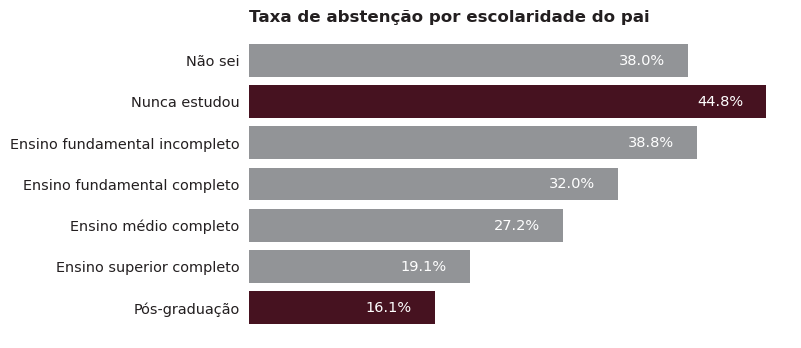

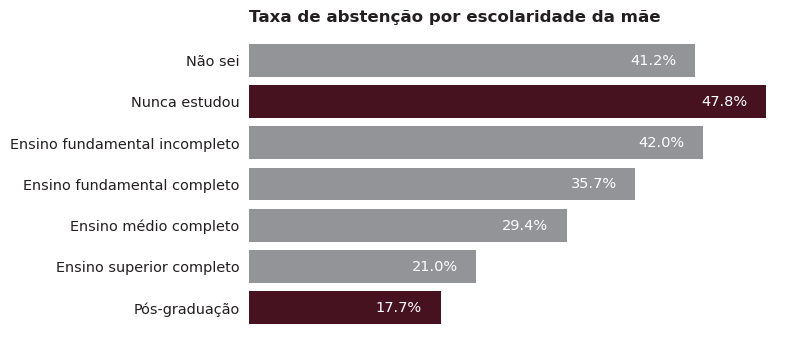

In [90]:
escolaridade_pai_absent = absent_df.groupby(['escolaridade_pai'])[['presente']].mean().reset_index()
escolaridade_pai_absent['ausente'] = round((1 - escolaridade_pai_absent['presente']) * 100, 1)
escolaridade_pai_absent['order_escolaridade'] = escolaridade_pai_absent['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
escolaridade_pai_absent = escolaridade_pai_absent.sort_values(by=['order_escolaridade'], ascending=True).reset_index(drop=True)

escolaridade_mae_absent = absent_df.groupby(['escolaridade_mae'])[['presente']].mean().reset_index()
escolaridade_mae_absent['ausente'] = round((1 - escolaridade_mae_absent['presente']) * 100, 1)
escolaridade_mae_absent['order_escolaridade'] = escolaridade_mae_absent['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
escolaridade_mae_absent = escolaridade_mae_absent.sort_values(by=['order_escolaridade'], ascending=True).reset_index(drop=True)


barh_plot(escolaridade_pai_absent, 'escolaridade_pai', 'ausente',
          title='Taxa de abstenção por escolaridade do pai', ytick_range=range(len(escolaridade_pai_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[CINZA7] + [VERMELHO_FORTE] + [CINZA7] * 4 + [VERMELHO_FORTE], figsize=(7, 4), 
          text_space=-6)

barh_plot(escolaridade_mae_absent, 'escolaridade_mae', 'ausente',
          title='Taxa de abstenção por escolaridade da mãe', ytick_range=range(len(escolaridade_mae_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[CINZA7] + [VERMELHO_FORTE] + [CINZA7] * 4 + [VERMELHO_FORTE], figsize=(7, 4), 
          text_space=-6)

- Sim, a escolaridade do pai e/ou da mãe influenciam a ausência do candidato na prova. Claramente, à medida que o nível de escolaridade aumenta, a taxa de abstenção cai.
- Por exemplo, analisando a escolaridade da mãe, é possível perceber que a taxa de abstenção entre candidatos cujas mães nunca estudaram é quase três vezes a taxa para aqueles cujas mães possuem pós graduação.

#### 7.3 A renda familiar mensal influencia a ausência do candidato na prova?

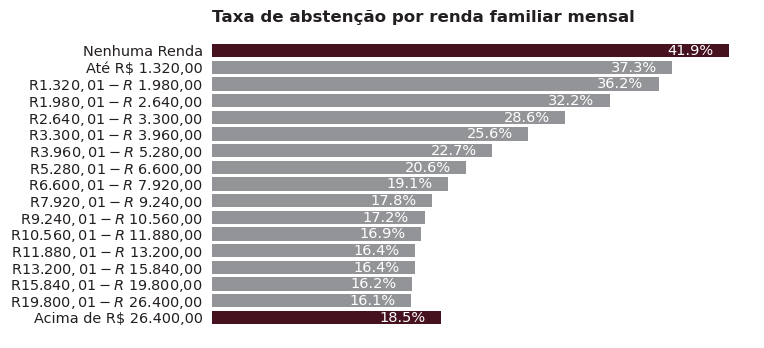

In [130]:
income_absent = absent_df.groupby(['renda_familiar_mensal'])[['presente']].mean().reset_index()
income_absent['ausente'] = round((1 - income_absent['presente']) * 100, 1)
income_absent['income_unique'] = income_absent['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_absent = income_absent.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_absent, 'renda_familiar_mensal', 'ausente',
          title='Taxa de abstenção por renda familiar mensal', ytick_range=range(len(income_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7] * 15, figsize=(7, 4), 
          text_space=-5)

- Sim, a renda familiar mensal influencia a ausência do candidato na prova. Claramente, à medida que a renda aumenta, a taxa de abstenção cai.
- Por exemplo, a taxa de abstenção entre candidatos que não possuem nenhuma renda é mais que o dobro da taxa entre aqueles que possuem rendas maiores que 5 mil reais.

#### 7.4 Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?

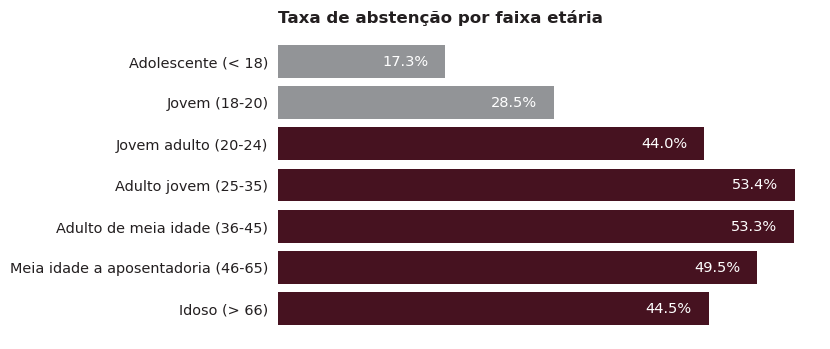

In [100]:
age_absent = absent_df.groupby(['faixa_etaria'])[['presente']].mean().reset_index()
age_absent['ausente'] = round((1 - age_absent['presente']) * 100, 1)
age_absent['limit_age'] = age_absent['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_absent = age_absent.sort_values(by=['limit_age'], ascending=True).reset_index(drop=True)

barh_plot(age_absent, 'faixa_etaria', 'ausente',
          title='Taxa de abstenção por faixa etária', ytick_range=range(len(age_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[CINZA7] * 2 + [VERMELHO_FORTE]*5, figsize=(7, 4), 
          text_space=-6.5)

- Jovens e adolescentes de até 20 anos tendem a ter uma taxa de abstenção menor que a de pessoas adultas a idosas.

#### 7.5 Quais regiões apresentam as maiores e as menores taxas de abstenção?

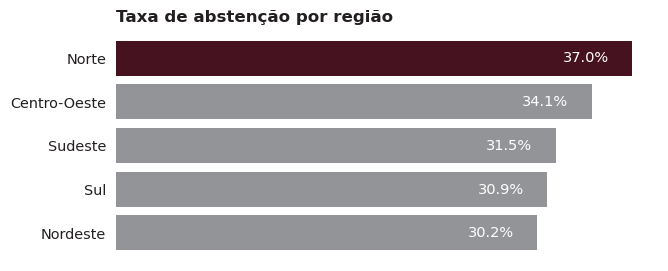

In [101]:
absent_df['regiao'] = define_regions(absent_df['uf_prova'])
region_absent = absent_df.groupby(['regiao'])[['presente']].mean().reset_index()
region_absent['ausente'] = round((1 - region_absent['presente']) * 100, 1)
region_absent = region_absent.sort_values(by=['ausente'], ascending=False)
barh_plot(region_absent, 'regiao', 'ausente',
          title='Taxa de abstenção por região', ytick_range=range(len(region_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7]*2 + [CINZA7]*2, figsize=(7, 3), 
          text_space=-5)

- A região norte apresenta a maior taxa de abstenção entre todas. Entretanto, todas as regiões possuem abstenções ao redor de 30-35%. A diferença não é tão expressiva.

#### 7.6 Existe alguma diferença na taxa de abstenção entre alunos de escola pública e privada?

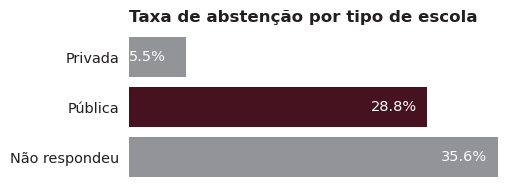

In [103]:
school_absent = absent_df.groupby(['escola'])[['presente']].mean().reset_index()
school_absent['ausente'] = round((1 - school_absent['presente']) * 100, 1)
school_absent = school_absent.sort_values(by=['ausente'], ascending=False)

barh_plot(school_absent, 'escola', 'ausente',
          title='Taxa de abstenção por tipo de escola', ytick_range=range(len(school_absent)),
          invert_yaxis=False, text_size=10.5, text_color=BRANCO, bar_color=[CINZA7] + [VERMELHO_FORTE], figsize=(5, 2), 
          text_space=-5.5)

- A proporção de ausentes para alunos de escola pública é 5 vezes maior que a proporção de ausentes para alunos de escola privada. Entre aqueles que não responderam, temos a maior taxa de abstenção, o que indica que essa variável carrega informação, podendo estar em sua maioria composta por candidatos de escolas públicas, dada a semelhante taxa de abstenção.

#### 7.8 A ocupação do pai e da mãe influenciam a ausência do candidato na prova?

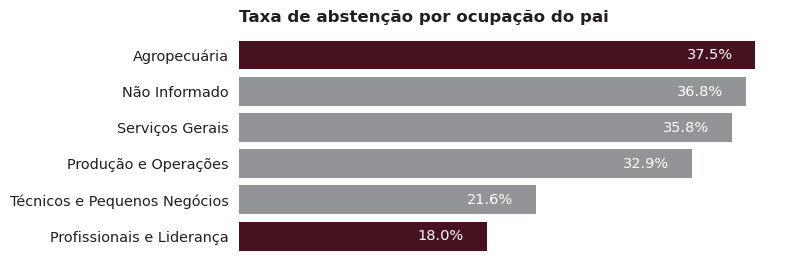

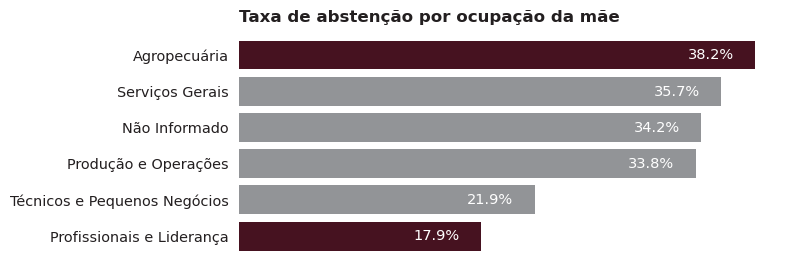

In [127]:
oc_pai_absent = absent_df.groupby(['ocupacao_pai'])[['presente']].mean().reset_index()
oc_pai_absent['ausente'] = round((1 - oc_pai_absent['presente']) * 100, 1)
oc_pai_absent = oc_pai_absent.sort_values(by=['ausente'], ascending=False)
barh_plot(oc_pai_absent, 'ocupacao_pai', 'ausente',
          title='Taxa de abstenção por ocupação do pai', ytick_range=range(len(oc_pai_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7]*2 + [CINZA7]*2, figsize=(7, 3),
          text_space=-5)

oc_mae_absent = absent_df.groupby(['ocupacao_mae'])[['presente']].mean().reset_index()
oc_mae_absent['ausente'] = round((1 - oc_mae_absent['presente']) * 100, 1)
oc_mae_absent = oc_mae_absent.sort_values(by=['ausente'], ascending=False)
barh_plot(oc_mae_absent, 'ocupacao_mae', 'ausente',
          title='Taxa de abstenção por ocupação da mãe', ytick_range=range(len(oc_mae_absent)),
          invert_yaxis=True, text_size=10.5, text_color=BRANCO, bar_color=[VERMELHO_FORTE] + [CINZA7]*2 + [CINZA7]*2, figsize=(7, 3),
          text_space=-5)

- Estudantes cujos pais ocupam profissões de maior prestígio social, qualificação educacional e renda apresentam uma abstenção 2 vezes menor que estudantes cujos pais ocupam profissões de trabalho manual, menor qualificação educacional e renda.

#### 7.9 Analisando as taxas de abstenção em outras variáveis

In [133]:
language_absent = absent_df.groupby(['lingua'])[['presente']].mean() * 100
language_absent['ausente'] = (100 - language_absent['presente'])
language_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
lingua,,
Espanhol,63.039723,36.960277
Inglês,72.540716,27.459284


In [138]:
home_absent = absent_df.groupby(['numero_pessoas_em_casa'])[['presente']].mean() * 100
home_absent['ausente'] = (100 - home_absent['presente'])
home_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
numero_pessoas_em_casa,,
11 a 20,58.280678,41.719322
6 a 10,64.073648,35.926352
1 a 3,65.577995,34.422005
4 a 5,71.546589,28.453411


In [107]:
treineiro_absent = absent_df.groupby(['treineiro'])[['presente']].mean() * 100
treineiro_absent['ausente'] = (100 - treineiro_absent['presente'])
treineiro_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
treineiro,,
Não,65.501708,34.498292
Sim,82.610508,17.389492


In [108]:
estado_civil_absent = absent_df.groupby(['estado_civil'])[['presente']].mean() * 100
estado_civil_absent['ausente'] = (100 - estado_civil_absent['presente'])
estado_civil_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
estado_civil,,
Casado(a)/União Estável,47.999780,52.000220
Viúvo(a),51.441103,48.558897
Divorciado(a)/Separado(a),53.108504,46.891496
Não informado,60.718324,39.281676
Solteiro(a),70.029725,29.970275


In [109]:
status_conclusao_absent = absent_df.groupby(['status_conclusao_ensino_medio'])[['presente']].mean() * 100
status_conclusao_absent['ausente'] = (100 - status_conclusao_absent['presente'])
status_conclusao_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
status_conclusao_ensino_medio,,
Não concluído,57.501869,42.498131
Concluído,58.455007,41.544993
Último ano,75.133503,24.866497
Cursando,82.610508,17.389492


#### 8. Conclusão
- Nesta análise exploratória de microdados do ENEM 2022, foram desenvolvidas duas análises:
    - Análise de Desempenho: 
        - Entre os objetivos da Análise de Desmpenho estão, entender qual o perfil dos candidatos que obtêm determinados resultados e quais variáveis se relacionam com a nota geral.
        - Portanto, a métrica em foco foi a nota geral e foram utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo, evitando assimetrias e distorções.
    - Análise de Abstenção (principal):
        - O objetivo da Análise de Abstenção é identificar os fatores que influenciam a ausência do candidato na prova. 
        - Portanto, foram utilizados dados de todos os candidatos, dando foco aos que estavam ausentes.
- Principais insights obtidos em ambas análises:
    - Ciências da Natureza é a área do conhecimento com o pior desempenho, apresentando uma nota média de 496. Além disso, metade dos alunos obtém um resultado de até 494, ilustrando a dificuldade em tal área. Foi possível observar um resultado geral baixo em todas as áreas. Claramente há uma disparidade entre o que é cobrado na prova e a qualidade da educação nas escolas.
    - Matemática apresenta o melhor desempenho entre as provas objetivas. Entretanto, isso se deve ao modelo do ENEM, que naturalmente atribui maior nota para um número menor de acertos nessa disciplina. 
    - Na redação, observa-se uma performance um pouco melhor no geral, com metade dos alunos obtendo uma nota acima de 620. 
    - A média geral é de 540, enquanto a nota máxima foi de 862.
    - Para ambos os dias, temos uma alta taxa de abstenção. Especialmente, no segundo dia de provas, 31% dos alunos não estavam presentes. Provavelmente, a maioria dessas ausências não se deve a razões randômicas, mas à falta de preparo e/ou confiança dos candidatos.
    - De forma surpreendente, 48% dos candidatos não possuem computador em casa. Além disso, 8% não possuem acesso a internet. Isso cria uma desigualdade de condições e afeta o resultado e a taxa de abstenção. Foi verificado que estudantes que não possuíam esses recursos obtiveram piores resultados e uma taxa de abstenção significativamente maior. Finalmente, metade desses alunos concentra-se na região nordeste do país.
    - Quanto maior a escolaridade do pai ou da mãe, melhor o desempenho do candidato. O mesmo é verdadeiro para a renda.
    - Claramente, à medida que o nível de escolaridade do pai e da mãe aumenta, a taxa de abstenção cai. Por exemplo, analisando a escolaridade da mãe, é possível perceber que a taxa de abstenção entre candidatos cujas mães nunca estudaram é quase o triplo da taxa para aqueles cujas mães possuem pós graduação. O mesmo vale para a ocupação dos pais, de forma que candidatos cujos pais ocupam posições de maior prestígio e renda tendem a uma abstenção 2 vezes menor.
    - Claramente, à medida que a renda aumenta, a taxa de abstenção cai. Por exemplo, a taxa de abstenção entre candidatos que não possuem nenhuma renda é mais que o dobro da taxa entre aqueles que possuem rendas maiores que 5 mil reais.
    - A região norte apresenta a maior taxa de abstenção entre todas. Entretanto, todas as regiões possuem abstenções ao redor de 30-35%. A diferença não é tão expressiva.
    - Em média, alunos de escola privada obtêm uma nota média 100 pontos acima que a de alunos de escola pública.
    - A proporção de ausentes para alunos de escola pública é 5 vezes maior que a proporção de ausentes para alunos de escola privada.